# House_Price_Prediction

In [1]:
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import os                        
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# 1. Data Preprocessing

In [150]:
# helper function to print messages
def cprint(title, *args):
    print(
        "="*len(title), title, "="*len(title),
        *args,
        sep="\n",
    )

### Loading the datasets.

In [16]:
import chardet

# 파일의 인코딩 형식 확인
with open('/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)


{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [22]:
import chardet
import pandas as pd

# 파일의 인코딩 형식 확인
file_path = '/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.txt'
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"파일의 인코딩: {encoding}")

# 확인된 인코딩을 사용하여 파일 읽기
match_build_seoul = pd.read_csv(file_path, sep='|', encoding=encoding, header=None)

# 데이터 출력
print(match_build_seoul.head())


파일의 인코딩: CP949


/tmp/ipykernel_240366/682759409.py:13: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(file_path, sep='|', encoding=encoding)


   1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  94  0.1  03047  ...  \
0  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  96    0   3047  ...   
1  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  98    0   3047  ...   
2  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    3   3032  ...   
3  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    3   3032  ...   
4  1111010100  서울특별시  종로구  청운동  111103100012  자하문로  0  99    4   3032  ...   

    953243.01328 1954025.806161  953241.683263  1954023.466812  Seoul  \
0  953247.695696   1.954041e+06  953243.258151    1.954034e+06  Seoul   
1  953248.552199   1.954060e+06  953240.877646    1.954055e+06  Seoul   
2  953194.413607   1.954068e+06  953195.459364    1.954079e+06  Seoul   
3  953183.480942   1.954081e+06  953195.459364    1.954079e+06  Seoul   
4  953188.419102   1.954103e+06  953193.346779    1.954097e+06  Seoul   

   Jongno-gu  Cheongun-dong  Jahamun-ro  1.2 Unnamed: 32  
0  Jongno-gu  Cheongun-dong  Jaha

In [18]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.txt"), sep='|', encoding='CP949', header=None, dtype=str)

In [ ]:
import pandas as pd

# Define the new column names
column_names = [
    "주소관할읍면동코드", "시도명", "시군구명", "읍면동명", "도로명코드", 
    "도로명", "지하여부", "건물본번", "건물부번", "우편번호", 
    "건물관리번호", "시군구용건물명", "건축물용도분류", "행정동코드", "행정동명", 
    "지상층수", "지하층수", "공동주택구분",'건물수', '상세건물명', '건물명변경이력', '상세건물명변경이력', '거주여부',
    '건물중심점_x좌표', '건물중심점_y좌표', '출입구_x좌표', '출입구_y좌표',
    '시도명(영문)', '시군구명(영문)', '읍면동명(영문)', '도로명(영문)',
    '읍면동구분', '이동사유코드'
]

# Assign these names to the DataFrame columns
match_build_seoul.columns = column_names

# Now you can work with your DataFrame as needed, for example:
print(match_build_seoul.head())  # Print the first 5 rows of the DataFrame to check everything is set correctly

# If you need to save the modified DataFrame back to a CSV
match_build_seoul.to_csv('match_build_seoul_modified.csv', index=False)  # index=False ensures that the DataFrame index is not written to the file


In [19]:
match_build_seoul['도로명주소'] = (
    match_build_seoul['시도명'].astype(str) + ' ' + 
    match_build_seoul['시군구명'].astype(str) + ' ' + 
    match_build_seoul['도로명'].astype(str) + ' ' + 
    match_build_seoul['건물본번'].astype(str) + 
    match_build_seoul['건물부번'].apply(lambda x: '' if x == 0 else '-' + str(x))
)
match_build_seoul.to_csv('match_build_seoul.csv', index=False)  

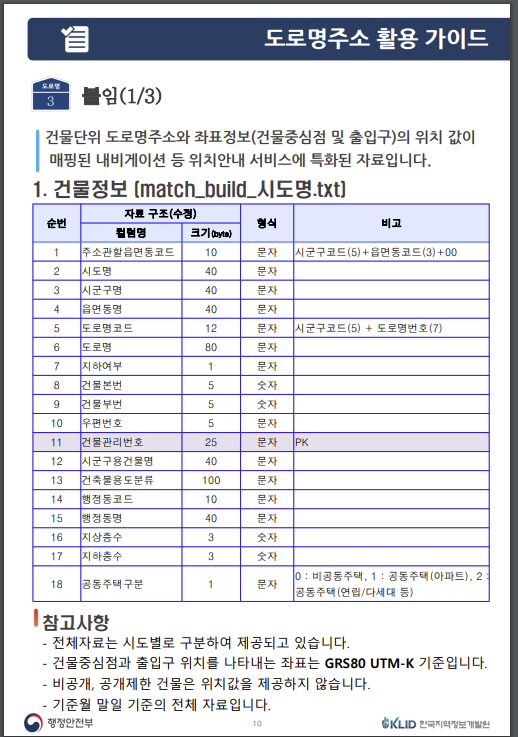 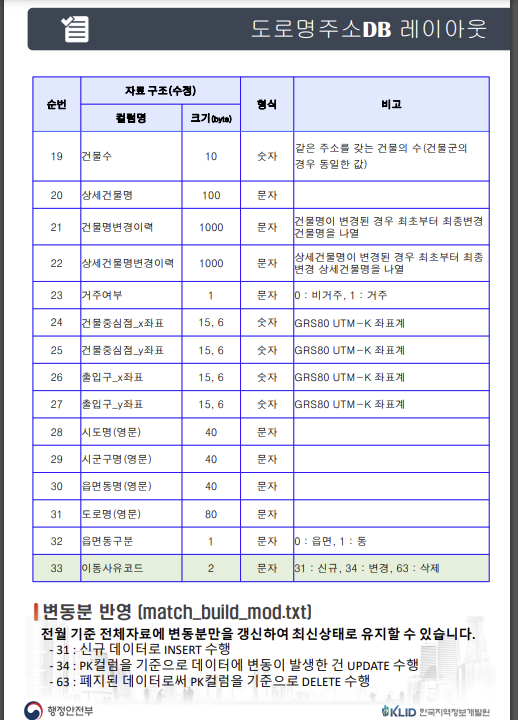

In [3]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
#academy = pd.read_csv(os.path.join(PATH, "ES1001AM00101MM2306_csv.csv"), delimiter='|', quotechar='"')
#academy = pd.read_csv(os.path.join(PATH, "academy.csv"))
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv"))

In [4]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (8325, 7)

/tmp/ipykernel_415536/3075528625.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (8325, 7)


In [22]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"

train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
test = pd.read_csv(os.path.join(PATH, "test.csv")) # (9272, 51)
#train_test = pd.read_csv(os.path.join(PATH, "train_test.csv")) # (1128094, 53)
train_test_final = pd.read_csv(os.path.join(PATH, "train_test_final.csv")) # 컬럼 추림
train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) # 
#trainset = pd.read_csv(os.path.join(PATH, "trainset.csv")) # 
#reconstruction = pd.read_csv(os.path.join(PATH, "reconstruction.csv"), encoding='CP949')
subway_feature = pd.read_csv(os.path.join(PATH, "subway_feature.csv"))
sample_submission = pd.read_csv(os.path.join(PATH, "sample_submission.csv"))
bus_feature = pd.read_csv(os.path.join(PATH, "bus_feature.csv"))
seoul_apart = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/seoul_apart.csv")
seoul_apart_jimi = pd.read_excel(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/서울시 공동주택 관리 현황 (2023.12.31.기준)_수정본.xlsx')
#reconstruction_modified = pd.read_csv(r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction_modified.csv", encoding='CP949')
# 출처: https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do 서울시 공동주택 아파트 정보
doroaddress = pd.read_csv(os.path.join(PATH, "doroaddress.csv")) # (8325, 7)
bunjiaddress = pd.read_csv(os.path.join(PATH, "bunjiaddress.csv")) # (8954, 1) 
# 출처: https://www.juso.go.kr/CommonPageLink.do?link=/support/AddressTransform 100만건 이하 주소전환
station_distance = pd.read_csv(os.path.join(PATH, "station_distance.csv"))
match_build_seoul = pd.read_csv(os.path.join(PATH, "match_build_seoul.csv")) # (599943, 38)
# match_build_seoul_for_model = pd.read_csv(os.path.join(PATH, "match_build_seoul_for_model.csv")) # (31377, 7)
#finance = pd.read_csv(os.path.join(PATH, "finance.csv"))
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv"))
#academy = pd.read_csv(os.path.join(PATH, "ES1001AM00101MM2306_csv.csv"), encoding='CP949', delimiter='|', quotechar='"')
academy = pd.read_csv(os.path.join(PATH, "academy.csv"))

/tmp/ipykernel_451325/1183520961.py:3: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(os.path.join(PATH, "train.csv")) # (1118822, 52)
/tmp/ipykernel_451325/1183520961.py:7: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  train_test_seoul_apart = pd.read_csv(os.path.join(PATH, "train_test_seoul_apart.csv")) #


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [8]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

### academy

In [188]:
# 기존 데이터프레임 df가 있다고 가정
column_names = [
    "단지고유번호", "필지고유번호", "도로명관리번호", "시군구코드", "지번주소",
    "공시가격기반단지명", "단지종류코드", "동수", "세대수", "사용승인일자",
    "소형학원수", "중형학원수", "대형학원수", "종합학원수", "입시학원수",
    "외국어학원수", "예체능학원수", "독서실수", "정보학원수", "특수교육학원수",
    "직업기술학원수", "기타학원수"
]
academy.columns = column_names


In [191]:
academy.dtypes

단지고유번호        int64
필지고유번호       object
도로명관리번호      object
시군구코드         int64
지번주소         object
공시가격기반단지명    object
단지종류코드        int64
동수            int64
세대수           int64
사용승인일자        int64
소형학원수         int64
중형학원수         int64
대형학원수         int64
종합학원수         int64
입시학원수         int64
외국어학원수        int64
예체능학원수        int64
독서실수          int64
정보학원수         int64
특수교육학원수       int64
직업기술학원수       int64
기타학원수         int64
dtype: object

In [200]:
academy[academy['시군구코드'].astype(str).str[:2]=='11'].to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/academy.csv', index=False)

In [207]:
trainset_0714.columns

Index(['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '도로명주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-전체동수_y', 'k-전체세대수_y', 'k-건설사(시공사)_y', '주차대수_y',
       'target', 'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출',
       '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양',
       '서울특별시_매매가격대비전세가격비', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance'],
      dtype='object')

In [213]:
academy.shape

(9143, 22)

In [289]:
academy = academy[~academy['공시가격기반단지명'].str.contains('임대')]

In [290]:
academy.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/academy.csv', index=False)

### doroaddress

In [247]:
doroaddress[doroaddress['지번주소'].duplicated()==True]

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소


In [243]:
doroaddress[doroaddress['지번주소'] == '서울특별시 구로구 고척동 97']

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
8317,전환성공,0.0,서울특별시 구로구 고척동 97,NaN,NaN,NaN,NaN
8329,전환성공,8232.0,서울특별시 구로구 고척동 97,서울 구로구 경서로 17,1153010600100970000014298,고척동,서울 구로구 고척동 경서로 17


In [244]:
index_names = doroaddress[(doroaddress['우편번호'] == 0)&(doroaddress['지번주소'] == '서울특별시 구로구 고척동 97')].index

In [245]:
index_names

Index([8317], dtype='int64')

In [246]:
doroaddress = doroaddress.drop(index=index_names)

In [248]:
doroaddress.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/doroaddress.csv', index=False)

### academy

In [291]:
academy.shape

(9111, 28)

In [292]:
academy = pd.merge(academy, doroaddress, left_on='지번주소', right_on='지번주소', how='left')

In [293]:
academy.shape

(9111, 34)

In [298]:
academy.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/academy.csv', index=False)

In [ ]:
academy[academy['지번주소'].duplicated()==True]

In [306]:
academy[academy['지번주소']=='서울특별시 노원구 중계동 505']

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x,결과코드_y,우편번호_y,도로명주소_y,건물관리번호_y,동_y,동도로명주소_y
2218,11350100002562,1135010600105050000,11350106311000500026500000,11350,서울특별시 노원구 중계동 505,경남,1,5,660,19890629,61,5,1,0,41,2,22,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2224,11350100002568,1135010600105050000,11350106311000500026500000,11350,서울특별시 노원구 중계동 505,롯데(505),1,5,570,19890629,61,5,1,0,41,2,22,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2227,11350100002571,1135010600105050000,11350106311000500026500000,11350,서울특별시 노원구 중계동 505,상아,1,5,660,19890629,61,5,1,0,41,2,22,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
trainset_0714[(trainset_0714['번지주소']=='서울특별시 노원구 중계동 505')&(trainset_0714['아파트명']=='롯데')]

,아파트명,전용면적(㎡),구,동,계약년월,층,번지주소,도로명주소,k-전체동수_y,k-전체세대수_y,건축년도,k-전체동수_y.1,k-전체세대수_y.1,k-건설사(시공사)_y,주차대수_y,target,is_test,전국_부동산소비자심리지수,국고채-회사채,서울특별시_가계대출,서울특별시_주택담보대출,서울특별시_주택매매거래량,서울특별시_아파트매매거래량,서울특별시_주택미분양,서울특별시_매매가격대비전세가격비,X,Y,Nearest_Bus_Station_Distance,Nearest_Subway_Station_Distance
36223,롯데,54.48,노원구,중계동,201710,11,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,32600.0,0,109.9,0.548,278568.7,175427.9,8561.0,3942.0,56.0,NaN,127.062639,37.638983,0.119791,0.554302
36224,롯데,84.97,노원구,중계동,201712,13,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,48000.0,0,102.2,0.549,282438.7,176991.0,13740.0,8484.0,45.0,NaN,127.062639,37.638983,0.119791,0.554302
36225,롯데,84.97,노원구,중계동,201801,13,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,49500.0,0,109.0,0.532,283669.8,177280.4,15107.0,9938.0,45.0,NaN,127.062639,37.638983,0.119791,0.554302
36226,롯데,84.97,노원구,중계동,201801,6,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,51000.0,0,109.0,0.532,283669.8,177280.4,15107.0,9938.0,45.0,NaN,127.062639,37.638983,0.119791,0.554302
36227,롯데,72.49,노원구,중계동,201801,1,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,39900.0,0,109.0,0.532,283669.8,177280.4,15107.0,9938.0,45.0,NaN,127.062639,37.638983,0.119791,0.554302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093891,롯데,54.48,노원구,중계동,200708,12,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,18900.0,0,NaN,0.420,NaN,NaN,12253.0,5450.0,730.0,42.9,127.062639,37.638983,0.119791,0.554302
1093892,롯데,72.49,노원구,중계동,200709,4,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,27500.0,0,NaN,0.460,NaN,NaN,10706.0,4613.0,724.0,42.8,127.062639,37.638983,0.119791,0.554302
1093893,롯데,84.97,노원구,중계동,200709,13,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,38000.0,0,NaN,0.460,NaN,NaN,10706.0,4613.0,724.0,42.8,127.062639,37.638983,0.119791,0.554302
1122116,롯데,84.97,노원구,중계동,202307,2,서울특별시 노원구 중계동 505,서울특별시 노원구 섬밭로 265,15.0,1890.0,1989,15.0,1890.0,"경남,롯데,상아건설",963.0,NaN,1,104.5,0.799,404538.4,245046.4,6081.0,3804.0,1081.0,NaN,127.062639,37.638983,0.119791,0.554302


### 여기부터 다시

In [373]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [374]:
trainset_0714.shape

(1128094, 65)

In [386]:
column_names = ['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소',
       '도로명주소', 'k-전체동수_y', 'k-전체세대수_y', '건축년도',
       'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test', '전국_부동산소비자심리지수',
       '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량',
       '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance'
]

column_names2 = [
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '동도로명주소_x']

In [381]:
trainset_0714 = trainset_0714[column_names]

In [383]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [385]:
academy.columns

Index(['단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '동도로명주소_x', '결과코드_y',
       '우편번호_y', '도로명주소_y', '건물관리번호_y', '동_y', '동도로명주소_y'],
      dtype='object')

In [387]:
academy = academy[column_names2]

In [388]:
academy.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/academy.csv')

In [391]:
trainset_0714.shape

(1128094, 27)

In [426]:
academy.shape

(9110, 28)

In [427]:
max_sedae_idx

('서울특별시 송파구 가락동 913', '헬리오시티')

In [415]:
# trainset_0714와 filtered_academy를 병합
df = pd.merge(trainset_0714, filtered_academy, left_on=['번지주소', '아파트명'], right_on=['지번주소', '공시가격기반단지명'], how='left')


In [416]:
df.shape

(1128094, 55)

In [432]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False)

In [445]:
aa = df[df.아파트명.isnull()==True][['번지주소','도로명주소']]
whatisapartname = aa[aa.duplicated()==True]

In [446]:
whatisapartname

,번지주소,도로명주소
3840,서울특별시 강남구 역삼동 828-21,서울특별시 강남구 테헤란로10길 25
3841,서울특별시 강남구 역삼동 828-21,서울특별시 강남구 테헤란로10길 25
18114,서울특별시 관악구 봉천동 685-103,서울특별시 관악구 당곡2길 109-11
18115,서울특별시 관악구 봉천동 685-103,서울특별시 관악구 당곡2길 109-11
25391,서울특별시 구로구 구로동 739-29,서울특별시 구로구 구로동로20길 28-10
...,...,...
1122857,서울특별시 동대문구 장안동 404-13,서울특별시 동대문구 천호대로77길 62
1123271,서울특별시 동작구 상도동 323-4,서울특별시 동작구 국사봉1길 18
1126863,서울특별시 영등포구 대림동 1101-1,서울특별시 영등포구 도림천로19길 12
1126864,서울특별시 영등포구 대림동 1101-1,서울특별시 영등포구 도림천로19길 12


In [443]:
whatisapartname = pd.merge(whatisapartname, seoul_apart_jimi, left_on='도로명주소', right_on='도로명주소', how='left')

In [444]:
whatisapartname

,번지주소,도로명주소,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y,입주유형_x,단지명_x,법정동주소_x,동수_x,합계 세대수_x,분양 세대수_x,임대 세대수_x,토지 면적(㎡)_x,합계 동수_x,5층 동수_x,5층 세대수_x,6~10층 동수_x,6~10층 세대수_x,11~15층 동수_x,11~15층 세대수_x,16~20층 동수_x,16~20층 세대수_x,21층이상 동수_x,21층이상 세대수_x,~40㎡ 세대수_x,40㎡~60㎡ 세대수_x,60㎡~85㎡ 세대수_x,85㎡~102㎡ 세대수_x,102㎡~135㎡ 세대수_x,135㎡~ 세대수_x,Unnamed: 26_x,Unnamed: 27_x,Unnamed: 28_x,Unnamed: 29_x,Unnamed: 30_x,Unnamed: 31_x,117_x,364_x,입주유형_y,단지명_y,법정동주소_y,동수_y,합계 세대수_y,분양 세대수_y,임대 세대수_y,토지 면적(㎡)_y,합계 동수_y,5층 동수_y,5층 세대수_y,6~10층 동수_y,6~10층 세대수_y,11~15층 동수_y,11~15층 세대수_y,16~20층 동수_y,16~20층 세대수_y,21층이상 동수_y,21층이상 세대수_y,~40㎡ 세대수_y,40㎡~60㎡ 세대수_y,60㎡~85㎡ 세대수_y,85㎡~102㎡ 세대수_y,102㎡~135㎡ 세대수_y,135㎡~ 세대수_y,Unnamed: 26_y,Unnamed: 27_y,Unnamed: 28_y,Unnamed: 29_y,Unnamed: 30_y,Unnamed: 31_y,117_y,364_y
0,서울특별시 강남구 역삼동 828-21,서울특별시 강남구 테헤란로10길 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 강남구 역삼동 828-21,서울특별시 강남구 테헤란로10길 25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시 관악구 봉천동 685-103,서울특별시 관악구 당곡2길 109-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울특별시 관악구 봉천동 685-103,서울특별시 관악구 당곡2길 109-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울특별시 구로구 구로동 739-29,서울특별시 구로구 구로동로20길 28-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,서울특별시 동대문구 장안동 404-13,서울특별시 동대문구 천호대로77길 62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,서울특별시 동작구 상도동 323-4,서울특별시 동작구 국사봉1길 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

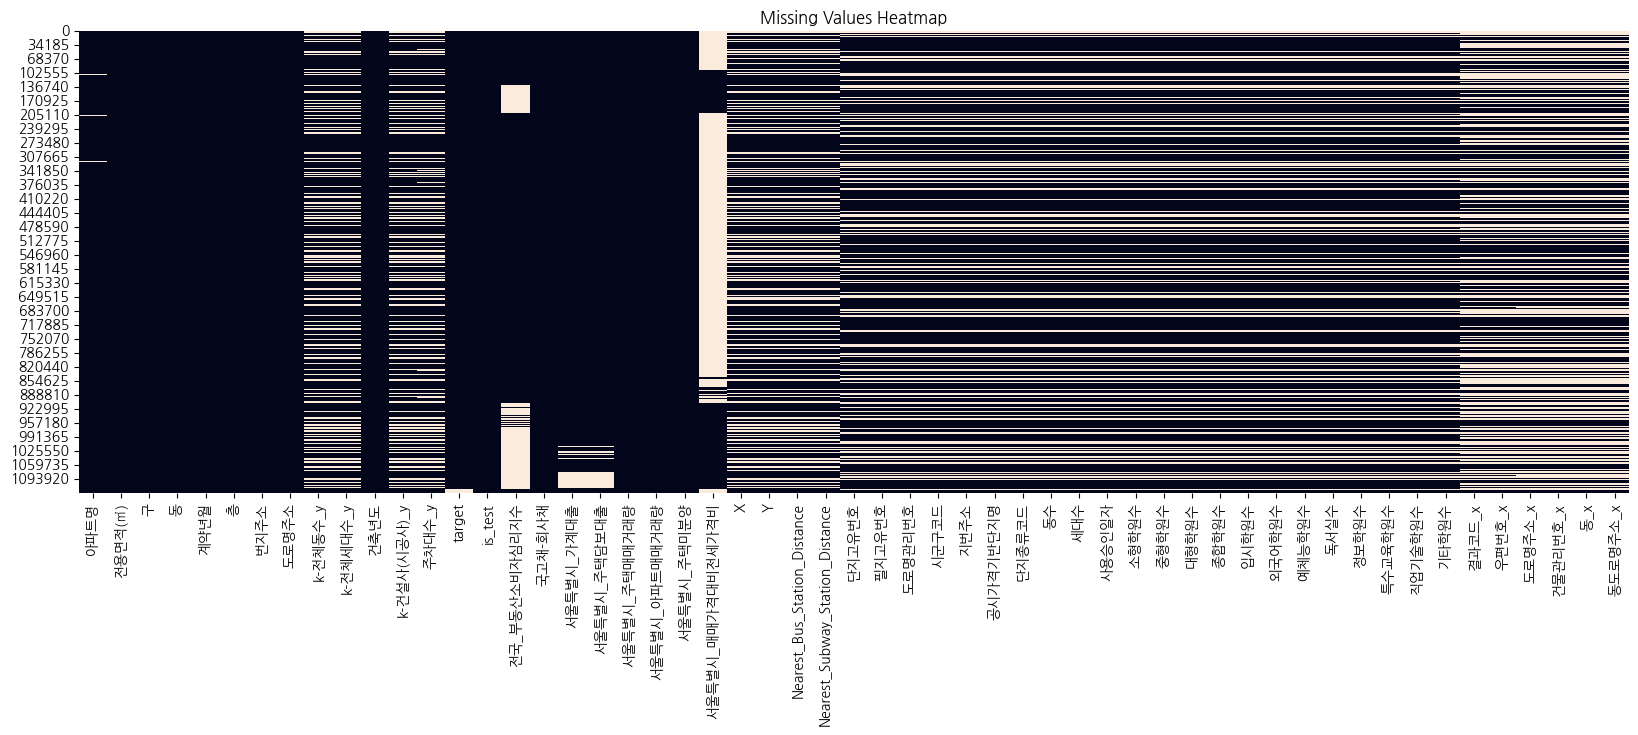

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [418]:
a = df[df['공시가격기반단지명'].isnull()==True][['아파트명', '공시가격기반단지명', '번지주소', '지번주소', '도로명주소', '도로명주소_x']]
a[~a.duplicated()==True]


,아파트명,공시가격기반단지명,번지주소,지번주소,도로명주소,도로명주소_x
0,개포6차우성,NaN,서울특별시 강남구 개포동 658-1,NaN,서울특별시 강남구 언주로 3,NaN
25,개포자이,NaN,서울특별시 강남구 개포동 12-2,NaN,서울특별시 강남구 개포로109길 69,NaN
38,개포주공1단지,NaN,서울특별시 강남구 개포동 141,NaN,서울특별시 강남구 개포로 310,NaN
44,개포주공1단지,NaN,서울특별시 강남구 개포동 141,NaN,서울특별시 강남구 선릉로 7,NaN
452,테헤란로대우아이빌,NaN,서울특별시 강남구 대치동 891-6,NaN,서울특별시 강남구 테헤란로 428,NaN
...,...,...,...,...,...,...
1123560,신수동르끌레브,NaN,서울특별시 마포구 신수동 400-1,NaN,서울특별시 마포구 토정로17길 6,NaN
1124723,르엘신반포파크애비뉴,NaN,서울특별시 서초구 잠원동 52-2,NaN,서울특별시 서초구 잠원로14길 42,NaN
1124909,히페리온리버팰리스,NaN,서울특별시 성동구 송정동 67-5,NaN,서울특별시 성동구 송정길 32,NaN
1127702,세운푸르지오헤리시티,NaN,서울특별시 중구 인현동2가 240,NaN,서울특별시 중구 마른내로 79,NaN


In [ ]:
trainset_0714[trainset_0714['번지주소']=='서울특별시 중구 입정동 277']

In [431]:
academy[academy['도로명주소_x']=='서울특별시 중구 을지로15길 31']

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x


In [429]:
academy[academy['지번주소']=='서울특별시 중구 입정동 277']

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x


In [ ]:
pd.merge(df, academy, left_on=)

In [339]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False)

In [341]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [348]:
filtered = academy[academy['지번주소']=='서울특별시 강남구 개포동 658-1']

In [349]:
filtered

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x,결과코드_y,우편번호_y,도로명주소_y,건물관리번호_y,동_y,동도로명주소_y
7586,11680100001448,1168010300106580001,11680103300508600000300000,11680,서울특별시 강남구 개포동 658-1,개포6차우성아파트1동~8동,1,8,270,19871121,39,3,0,2,23,1,14,0,0,0,1,1,전환성공,6316.0,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3


In [352]:
# trainset_0714 데이터프레임의 0번 인덱스 행에 대해 여러 컬럼의 값을 업데이트 index=0,1,2
trainset_0714.loc[2, [
    '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', 
    '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', 
    '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', 
    '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', 
    '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x', 
    '건물관리번호_x', '동_x', '동도로명주소_x', '결과코드_y', '우편번호_y', 
    '도로명주소_y', '건물관리번호_y', '동_y', '동도로명주소_y'
]] = [
    11680100001448, 1168010300106580001, '11680103300508600000300000', 11680, '서울특별시 강남구 개포동 658-1', 
    '개포6차우성아파트1동~8동', 1, 8, 270, 19871121, 
    39, 3, 0, 2, 23, 
    1, 14, 0, 0, 0, 
    1, 1, '전환성공', 6316.0, '서울특별시 강남구 언주로 3', 
    '1168010300106580001019759', '개포동', '서울특별시 강남구 개포동 언주로 3', '전환성공', 6316.0, 
    '서울특별시 강남구 언주로 3', '1168010300106580001019759', '개포동', '서울특별시 강남구 개포동 언주로 3'
]


In [358]:
df3 = trainset_0714[trainset_0714.단지고유번호.isnull()==True][['아파트명','번지주소','도로명주소']]

In [362]:
df3 = df3.drop_duplicates()

In [363]:
df3

,아파트명,번지주소,도로명주소
3,개포6차우성,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3
25,개포자이,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69
38,개포주공1단지,서울특별시 강남구 개포동 141,서울특별시 강남구 개포로 310
44,개포주공1단지,서울특별시 강남구 개포동 141,서울특별시 강남구 선릉로 7
452,테헤란로대우아이빌,서울특별시 강남구 대치동 891-6,서울특별시 강남구 테헤란로 428
...,...,...,...
1123560,신수동르끌레브,서울특별시 마포구 신수동 400-1,서울특별시 마포구 토정로17길 6
1124723,르엘신반포파크애비뉴,서울특별시 서초구 잠원동 52-2,서울특별시 서초구 잠원로14길 42
1124909,히페리온리버팰리스,서울특별시 성동구 송정동 67-5,서울특별시 성동구 송정길 32
1127702,세운푸르지오헤리시티,서울특별시 중구 인현동2가 240,서울특별시 중구 마른내로 79


In [ ]:
academy

In [369]:
ac3 = academy[['공시가격기반단지명','지번주소','도로명주소_x']]

In [371]:
ac3[ac3['지번주소']=='서울특별시 강남구 개포동 12-2']

,공시가격기반단지명,지번주소,도로명주소_x
7762,개포자이(12-2),서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69


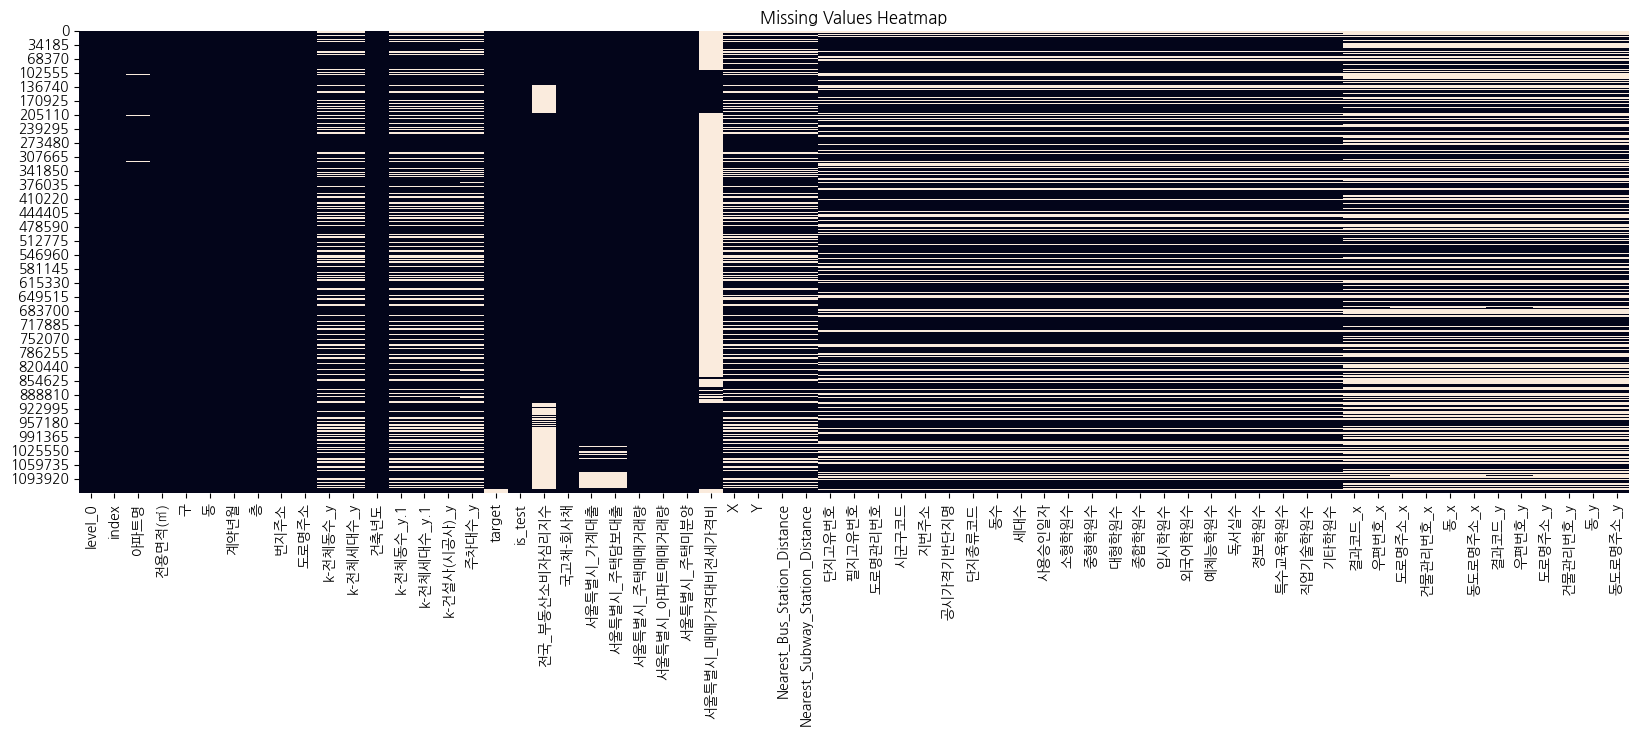

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(trainset_0714.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [344]:
trainset_0714.columns

Index(['level_0', 'index', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소',
       '도로명주소', 'k-전체동수_y', 'k-전체세대수_y', '건축년도', 'k-전체동수_y.1', 'k-전체세대수_y.1',
       'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test', '전국_부동산소비자심리지수',
       '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출', '서울특별시_주택매매거래량',
       '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '동도로명주소_x', '결과코드_y',
       '우편번호_y', '도로명주소_y', '건물관리번호_y', '동_y', '동도로명주소_y'],
      dtype='object')

In [333]:
academy[academy['지번주소']=='서울특별시 마포구 공덕동 479']

#3658 인덱스 중 세대수 472로 업데이트 (단지고유번호 11440120412603)
#3659 인덱스 삭제 (단지고유번호 11440120412604)

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x,결과코드_y,우편번호_y,도로명주소_y,건물관리번호_y,동_y,동도로명주소_y
3658,11440120412603,1144010200104790000,11440102413924100000700000,11440,서울특별시 마포구 공덕동 479,공덕SK리더스뷰,1,3,472,20211118,113,27,5,4,89,12,35,1,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
index_names = academy[academy['단지고유번호']==11440120412604].index
academy = academy.drop(index=index_names)

In [332]:
academy.loc[academy['단지고유번호'] == 11440120412603, '세대수'] = 472

In [334]:
academy[academy[['지번주소','공시가격기반단지명']].duplicated()==True]

,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x,결과코드_y,우편번호_y,도로명주소_y,건물관리번호_y,동_y,동도로명주소_y


In [335]:
# 원본 'trainset_0714'과 병합된 'df'의 인덱스를 재설정
trainset_0714 = trainset_0714.reset_index()
df = df.reset_index()

# 'df'에서 병합으로 인해 추가된 행 찾기
new_rows = df[~df['index'].isin(trainset_0714['index'])]

In [ ]:
trainset_0714[trainset_0714['번지주소']=='서울특별시 중구 묵정동 11-67']

In [336]:
new_rows

,level_0,index,아파트명,전용면적(㎡),구,동,계약년월,층,번지주소,도로명주소,k-전체동수_y,k-전체세대수_y,건축년도,k-전체동수_y.1,k-전체세대수_y.1,k-건설사(시공사)_y,주차대수_y,target,is_test,전국_부동산소비자심리지수,국고채-회사채,서울특별시_가계대출,서울특별시_주택담보대출,서울특별시_주택매매거래량,서울특별시_아파트매매거래량,서울특별시_주택미분양,서울특별시_매매가격대비전세가격비,X,Y,Nearest_Bus_Station_Distance,Nearest_Subway_Station_Distance,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,결과코드_x,우편번호_x,도로명주소_x,건물관리번호_x,동_x,동도로명주소_x,결과코드_y,우편번호_y,도로명주소_y,건물관리번호_y,동_y,동도로명주소_y
1128094,1128094,1128094,묵정,52.46,중구,묵정동,202309,9,서울특별시 중구 묵정동 11-67,서울특별시 중구 서애로1길 34,1.0,122.0,1981,1.0,122.0,라이프주택,45.0,NaN,1,108.6,0.760,407049.8,248147.3,6396.0,3845.0,914.0,NaN,127.000071,37.560706,0.186311,0.520773,1.114010e+13,1.114014e+18,11140136410318300003400000,11140.0,서울특별시 중구 묵정동 11-67,묵정,1.0,1.0,122.0,19810525.0,8.0,0.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,전환성공,4620.0,서울특별시 중구 서애로1길 34,1114013600100110067018019,묵정동,서울특별시 중구 묵정동 서애로1길 34,전환성공,4620.0,서울특별시 중구 서애로1길 34,1114013600100110067018019,묵정동,서울특별시 중구 묵정동 서애로1길 34
1128095,1128095,1128095,신내우디안1단지,84.65,중랑구,신내동,202307,13,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,16.0,1402.0,2014,16.0,1402.0,한신공영(주),1568.0,NaN,1,104.5,0.799,404538.4,245046.4,6081.0,3804.0,1081.0,NaN,127.106720,37.618870,0.059479,0.732831,1.126012e+13,1.126011e+18,11260106411858900008500000,11260.0,서울특별시 중랑구 신내동 816,신내우디안1단지,1.0,16.0,1402.0,20140618.0,10.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85
1128096,1128096,1128096,신내우디안1단지,84.62,중랑구,신내동,202307,12,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,16.0,1402.0,2014,16.0,1402.0,한신공영(주),1568.0,NaN,1,104.5,0.799,404538.4,245046.4,6081.0,3804.0,1081.0,NaN,127.106720,37.618870,0.059479,0.732831,1.126012e+13,1.126011e+18,11260106411858900008500000,11260.0,서울특별시 중랑구 신내동 816,신내우디안1단지,1.0,16.0,1402.0,20140618.0,10.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85
1128097,1128097,1128097,신내우디안1단지,101.65,중랑구,신내동,202308,12,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,16.0,1402.0,2014,16.0,1402.0,한신공영(주),1568.0,NaN,1,107.2,0.773,406315.8,246930.7,6716.0,4091.0,976.0,NaN,127.106720,37.618870,0.059479,0.732831,1.126012e+13,1.126011e+18,11260106411858900008500000,11260.0,서울특별시 중랑구 신내동 816,신내우디안1단지,1.0,16.0,1402.0,20140618.0,10.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85
1128098,1128098,1128098,신내우디안1단지,84.94,중랑구,신내동,202309,18,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,16.0,1402.0,2014,16.0,1402.0,한신공영(주),1568.0,NaN,1,108.6,0.760,407049.8,248147.3,6396.0,3845.0,914.0,NaN,127.106720,37.618870,0.059479,0.732831,1.126012e+13,1.126011e+18,11260106411858900008500000,11260.0,서울특별시 중랑구 신내동 816,신내우디안1단지,1.0,16.0,1402.0,20140618.0,10.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85
1128099,1128099,1128099,신내우디안1단지,84.65,중랑구,신내동,202309,13,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,16.0,1402.0,2014,16.0,1402.0,한신공영(주),1568.0,NaN,1,108.6,0.760,407049.8,248147.3,6396.0,3845.0,914.0,NaN,127.106720,37.618870,0.059479,0.732831,1.126012e+13,1.126011e+18,11260106411858900008500000,11260.0,서울특별시 중랑구 신내동 816,신내우디안1단지,1.0,16.0,1402.0,20140618.0,10.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동,서울특별시 중랑구 신내동 신내역로1길 85


### train_test_final

In [59]:
train_test_final = train_test.drop(columns=['해제사유발생일','등기신청일자','거래유형','중개사소재지','k-전화번호','k-팩스번호','단지소개기존clob','k-세대타입(분양형태)','k-관리방식','k-난방방식','k-홈페이지','k-등록일자','k-수정일자','고용보험관리번호','경비비관리형태','세대전기계약방법','청소비관리형태','기타/의무/임대/임의=1/2/3/4','단지승인일','사용허가여부','관리비 업로드','단지신청일'])

In [61]:
train_test_final.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_final.csv')

### MATCH_BUILD_SEOUL 좌표추가

In [27]:
# 테스트
import pyproj

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환할 UTM-K 좌표 (서울특별시 대략적인 UTM-K 좌표)
#x = match_build_seoul[(match_build_seoul['공동주택구분']==1)&(match_build_seoul['도로명주소']=='서울특별시 강남구 언주로 3')]['건물중심점_x좌표']  # 대략적인 UTM-K X 좌표
x = 960679.207519
y = 1.942024e+06  # 대략적인 UTM-K Y 좌표

# 좌표 변환 (UTM-K -> WGS84)
longitude, latitude = transformer.transform(x, y)

print(f"위도: {latitude}, 경도: {longitude}") # 위도: 37.476607957178274, 경도: 127.05528456855924


위도: 37.476607957178274, 경도: 127.05528456855924


In [ ]:
# UTM-K -> WGS84
import pyproj
import pandas as pd
# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)
# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)
# 변환 함수 정의
def transform_coordinates(row):
    longitude, latitude = transformer.transform(row['건물중심점_x좌표'], row['건물중심점_y좌표'])
    #longitude, latitude = transformer.transform(row['출입구_x좌표'], row['출입구_y좌표'])
    return pd.Series([longitude, latitude])
# 데이터프레임에 새로운 열 추가
match_build_seoul[['건물중심점_x좌표_wgs84', '건물중심점_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)
#match_build_seoul[['출입구_x좌표_wgs84', '출입구_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)
print(match_build_seoul)

## seoul_apart에서 중복된 행을 찾아서 reconstruction으로 만들고 이를 reconstrunction_modified로 중복제거해줌.
seoul_apart (2791, 22)
reconstruction_modified (91, 22)

  seoul_apart에서 중복된 행을 제외한 것 (2605, 22) 
+ reconstrunction_modified (91, 22)
= seoul_apart_new (2696, 22)

train_test_seoul_apart = pd.merge(train_test_final, seoul_apart_new, left_on='도로명주소', right_on='kapt도로명주소', how='left' )
(1128094, 61) 딱 맞음

In [59]:
no_duplicated_seoul_apart = seoul_apart[~seoul_apart.duplicated(subset=['kapt도로명주소'], keep=False)]

In [60]:
no_duplicated_seoul_apart.shape

(2605, 22)

In [85]:
seoul_apart_new = pd.concat([no_duplicated_seoul_apart, reconstruction_modified], ignore_index=True)

In [86]:
seoul_apart_new.shape

(2696, 22)

In [87]:
seoul_apart.shape

(2791, 22)

In [88]:
train_test_seoul_apart = pd.merge(train_test_final, seoul_apart_new, left_on='도로명주소', right_on='kapt도로명주소', how='left' )

In [89]:
train_test_seoul_apart.shape

(1128094, 61)

In [93]:
train_test_seoul_apart.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_seoul_apart.csv', index=False)

In [73]:
train_test_final.shape

(1128094, 39)

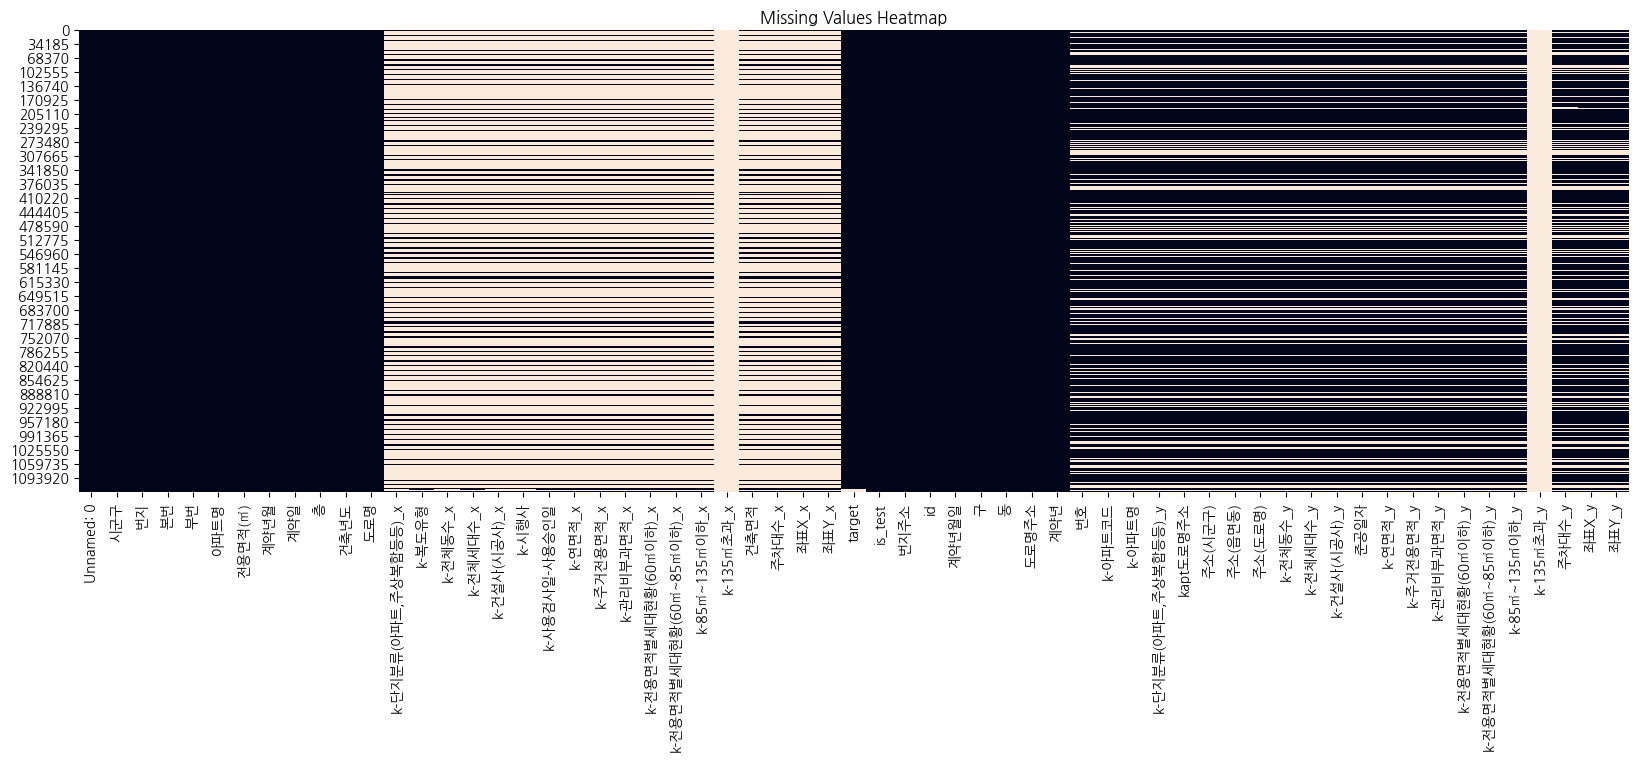

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(train_test_seoul_apart.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [94]:
train_test_seoul_apart[train_test_seoul_apart['k-아파트코드'].isna()==True].to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_seoul_apart_no_matching.csv', index=False)

In [95]:
train_test_seoul_apart_no_matching = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/train_test_seoul_apart_no_matching.csv')

In [116]:
df =train_test_seoul_apart_no_matching[train_test_seoul_apart_no_matching['is_test']==1][['아파트명','도로명주소','k-아파트명','건축년도']].drop_duplicates(inplace=False)

In [117]:
df.shape

(911, 4)

In [123]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/test_error.csv', index=False, encoding='CP949')

In [125]:
test_error = df.copy()

In [126]:
test_error

,아파트명,도로명주소,k-아파트명,건축년도
261864,개포주공6단지,서울특별시 강남구 개포로 516,NaN,1983
261867,개포주공7단지,서울특별시 강남구 개포로 516,NaN,1983
261871,마블하우스,서울특별시 강남구 봉은사로51길 36,NaN,2003
261872,한양수자인어반게이트,서울특별시 강남구 봉은사로29길 35,NaN,2013
261873,대우아이빌멤버스,서울특별시 강남구 삼성로85길 42,NaN,2003
...,...,...,...,...
263402,상봉힐스테이,서울특별시 중랑구 봉우재로37길 17,NaN,2021
263404,"엘지,쌍용",서울특별시 중랑구 봉화산로 130,NaN,1996
263408,주함해븐타워,서울특별시 중랑구 면목로 491,NaN,2015
263409,중앙하이츠,서울특별시 중랑구 봉화산로56길 123,NaN,1996


In [138]:
seoul_apart_new[seoul_apart_new['k-아파트명']=='래미안대치팰리스']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y


In [137]:
seoul_apart_new[seoul_apart_new['kapt도로명주소']=='서울특별시 강남구 삼성로51길 37']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y


### reconstruction

In [60]:
# 중복된 행 찾기
duplicate_rows = seoul_apart[seoul_apart.duplicated(subset=['kapt도로명주소'], keep=False)]


In [62]:
reconstruction = duplicate_rows

In [90]:
reconstruction.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction.csv', index=False, encoding='CP949')

In [77]:
train_test_final[(train_test_final['아파트명'].str.contains('우성')==True)&(train_test_final['건축년도']==1996)&(train_test_final['도로명'].str.contains('서초구')==True)]

,Unnamed: 0,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-복도유형,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년


In [91]:
train_test_final[(train_test_final['도로명주소'].str.contains('서울특별시 노원구 덕릉로 753'))]

,Unnamed: 0,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)",k-복도유형,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,건축면적,주차대수,좌표X,좌표Y,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년


In [112]:
train_test_final[(train_test_final['도로명주소'].str.contains('서울특별시 강서구 강서로68길 36')==True)].아파트명.unique()

array(['등촌1,2단지주공'], dtype=object)

In [ ]:
train_test_final

In [113]:
reconstruction_modified = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/reconstruction_modified.csv', encoding='CP949')

## reconstruction 안에서 중복되고 train_test에는 없어서 삭제해야 하는 아파트코드 
A13789201 : 같은 지역에 한 동만 따로 관리됨 양재우성KBS(113동)
A13790905	반포르엘	아파트	서울특별시 서초구 신반포로23길 23 재건축 전 데이터
A13780001	래미안원펜타스	아파트	서울특별시 서초구 신반포로15길 1	재건축 전 데이터
A14207201	래미안수유임대	아파트	서울특별시 강북구 한천로159길 8 재건축 전 데이터
A12180404	공덕삼성임대	아파트	서울특별시 마포구 마포대로 115-8 재건축 전 데이터




In [78]:
reconstruction

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
5,7,A13789201,양재우성KBS(113동),아파트,서울특별시 서초구 바우뫼로 91,서초구,양재동,바우뫼로,1,150,우성건설,1996-12-31,16533.0,12704.0,16533.0,0.0,150.0,0.0,NaN,97.0,127.0290739,37.477501
149,155,A13790905,반포르엘,아파트,서울특별시 서초구 신반포로23길 23,서초구,잠원동,신반포로23길,1,178,한신공영(주),2022-08-00,20673.0,18697.0,20559.0,0.0,0.0,178.0,NaN,172.0,127.002301,37.508793
161,167,A13780001,래미안원펜타스,아파트,서울특별시 서초구 신반포로15길 1,서초구,반포동,신반포로15길,8,180,한신공영(주),1982-06-26,37995.0,28662.0,35397.0,0.0,0.0,30.0,NaN,31.0,126.9936943,37.503832
166,172,A14207201,래미안수유임대,아파트,서울특별시 강북구 한천로159길 8,강북구,수유동,한천로159길,1,180,삼성물산,2001-11-29,13213.0,5897.0,13213.0,180.0,0.0,0.0,NaN,126.0,127.0181926,37.644796
391,400,A12180404,공덕삼성임대,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,1,226,삼성건설,1999-10-16,13392.0,7406.0,13388.0,226.0,0.0,0.0,NaN,77.0,126.950904,37.548075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,40363,A10023060,노원롯데캐슬시그니처2단지,아파트,서울특별시 노원구 덕릉로 753,노원구,상계동,덕릉로,6,610,롯데건선,2023-06-28,89035.0,43116.0,43117.0,351.0,255.0,4.0,NaN,752.0,127.0777624,37.665161
2774,40368,A10023024,노원롯데캐슬시그니처1단지,아파트,서울특별시 노원구 덕릉로 753,노원구,상계동,덕릉로,4,553,롯데건설(주),2023-06-28,74571.0,35725.0,48263.0,304.0,218.0,31.0,NaN,665.0,127.0777624,37.665161
2780,40387,A10022859,디에이치퍼스티어아이파크,아파트,서울특별시 강남구 개포로 310,강남구,개포동,개포로,74,6702,"현대산업개발, 현대건설",2023-11-29,1306341.0,570727.0,570727.0,NaN,NaN,NaN,NaN,13154.0,127.057848,37.480287
2788,40407,A10022649,송파더플래티넘,아파트,서울특별시 송파구 성내천로6길 1-13,송파구,오금동,성내천로6길,2,328,주식회사쌍용,2024-01-30,49938.0,27601.0,36255.0,30.0,119.0,179.0,NaN,320.0,127.1363056,37.503297


In [84]:
test.계약년월.min()


np.int64(202307)

In [85]:
test.계약년월.max()

np.int64(202309)

In [88]:
reconstruction[reconstruction['kapt도로명주소']=='서울특별시 마포구 마포대로 115-8']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
391,400,A12180404,공덕삼성임대,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,1,226,삼성건설,1999-10-16,13392.0,7406.0,13388.0,226.0,0.0,0.0,NaN,77.0,126.950904,37.548075
1232,1268,A12180407,공덕삼성,아파트,서울특별시 마포구 마포대로 115-8,마포구,공덕동,마포대로,5,651,삼성물산,1999-10-16,89512.0,53512.0,71155.0,230.0,287.0,134.0,NaN,658.0,126.9514816,37.546801


In [51]:
train_test_seoul_apart = pd.merge(df, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소',how='left')

In [54]:
train_test_seoul_apart.shape

(1207575, 42)

In [ ]:
train_test_seoul_apart[train_test_seoul_apart['도로명주소']=='서울특별시 강남구 삼성로 150'] # 127.05721	37.476763

In [64]:
train_test_seoul_apart.shape

(1207575, 42)

In [ ]:
# 테스트 UTM-K -> WGS84
import pyproj

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환할 UTM-K 좌표 (서울특별시 대략적인 UTM-K 좌표)
x = match_build_seoul[(match_build_seoul['공동주택구분']==1)]['건물중심점_x좌표']  # 대략적인 UTM-K X 좌표
y = match_build_seoul[(match_build_seoul['공동주택구분']==1)]['건물중심점_y좌표']  # 대략적인 UTM-K X 좌표


# 좌표 변환 (UTM-K -> WGS84)
longitude, latitude = transformer.transform(x, y)

print(f"위도: {latitude}, 경도: {longitude}") # 위도: 37.476607957178274, 경도: 127.05528456855924


In [ ]:
# UTM-K -> WGS84

import pyproj
import pandas as pd

# UTM-K 좌표계 정의
utm_k = pyproj.CRS('EPSG:5179')  # UTM-K 좌표계
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 좌표계 (위도/경도)

# 변환기 설정 (UTM-K에서 WGS84로 변환)
transformer = pyproj.Transformer.from_crs(utm_k, wgs84, always_xy=True)

# 변환 함수 정의
def transform_coordinates(row):
    longitude, latitude = transformer.transform(row['건물중심점_x좌표'], row['건물중심점_y좌표'])
    #longitude, latitude = transformer.transform(row['출입구_x좌표'], row['출입구_y좌표'])
    return pd.Series([longitude, latitude])

# 데이터프레임에 새로운 열 추가
match_build_seoul[['건물중심점_x좌표_wgs84', '건물중심점_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)
#match_build_seoul[['출입구_x좌표_wgs84', '출입구_y좌표_wgs84']] = match_build_seoul.apply(transform_coordinates, axis=1)

print(match_build_seoul)


In [40]:
match_build_seoul.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv', index=False)

In [ ]:
match_build_seoul.head(3)

In [108]:
match_build_seoul['건축물용도분류'].unique()

array(['근린생활시설', '주택', '업무시설', '교육및복지시설', '종교시설', '공공용시설', '문화/관광/레저시설',
       '공장/창고시설', '유통시설', '유흥/위락시설', '의료시설', nan, '자동차관련시설', '숙박시설',
       '보안/위험시설', '환경정화시설', '농축수산시설', '여객(화물)운송시설', '장묘시설'], dtype=object)

In [43]:
match_build_seoul[(match_build_seoul['공동주택구분']==1)&(match_build_seoul['도로명주소']=='서울특별시 강남구 삼성로 150')][['도로명주소','']]

,주소관할읍면동코드,시도명,시군구명,읍면동명,도로명코드,도로명,지하여부,건물본번,건물부번,우편번호,건물관리번호,시군구용건물명,건축물용도분류,행정동코드,행정동명,지상층수,지하층수,공동주택구분,건물수,상세건물명,건물명변경이력,상세건물명변경이력,거주여부,건물중심점_x좌표,건물중심점_y좌표,출입구_x좌표,출입구_y좌표,시도명(영문),시군구명(영문),읍면동명(영문),도로명(영문),읍면동구분,이동사유코드,도로명주소,건물중심점_x좌표_wgs84,건물중심점_y좌표_wgs84,출입구_x좌표_wgs84,출입구_y좌표_wgs84
543436,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014289,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,208,NaN,NaN,1,961863.116562,1.944136e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068565,37.495695,127.064106,37.493378
543437,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014303,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,201,NaN,NaN,1,961757.523332,1.944098e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067372,37.495346,127.064106,37.493378
543438,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014311,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,209,NaN,NaN,1,961888.063098,1.944076e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068850,37.495150,127.064106,37.493378
543440,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014329,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,202,NaN,NaN,1,961785.934555,1.944025e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067697,37.494694,127.064106,37.493378
543441,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014335,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,210,NaN,NaN,1,961910.326358,1.944013e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.069105,37.494588,127.064106,37.493378
543443,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014357,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,203,NaN,NaN,1,961807.184963,1.943964e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.067941,37.494143,127.064106,37.493378
543444,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014364,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,211,NaN,NaN,1,961934.094727,1.943951e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.069377,37.494028,127.064106,37.493378
543445,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014377,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,107,NaN,NaN,1,961671.156342,1.943935e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.066404,37.493878,127.064106,37.493378
543446,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014392,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,205,NaN,NaN,1,961830.148162,1.943903e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.068204,37.493591,127.064106,37.493378
543447,1168010600,서울특별시,강남구,대치동,116803122005,삼성로,0,150,0,6288,1168010600105110000014394,한보미도맨션,주택,1.168061e+09,대치2동,14,1,1,24,101,NaN,NaN,1,961543.676734,1.943901e+06,961467.788626,1.943881e+06,Seoul,Gangnam-gu,Daechi-dong,Samseong-ro,1,NaN,서울특별시 강남구 삼성로 150,127.064963,37.493565,127.064106,37.493378


## read_csv 만들기 위한 데이터전처리 과정 --> 완료

### bunjiaddress

In [ ]:
import pandas as pd

# Assuming 'train_test' is your DataFrame
# Extract unique values from '번지주소' column and convert them to a DataFrame
unique_addresses = pd.DataFrame(train_test['번지주소'].unique(), columns=['Unique Addresses'])

# Save to a CSV file with cp949 encoding, no index, and no header
unique_addresses.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949', index=False, header=False)


In [ ]:
doroaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", encoding='cp949') # 
bunjiaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949') # 

doroaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", encoding='utf-8', index=False)
bunjiaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='utf-8', index=False)


In [152]:
bunjiaddress.rename(columns={0:'번지주소'}, inplace=True)

In [153]:
bunjiaddress = bunjiaddress.drop(bunjiaddress.columns[0], axis=1)

In [ ]:
bunjiaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\번지주소.txt", encoding='cp949', header=None) #  


In [ ]:
bunjiaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\bunjiaddress.csv", index=False)

In [245]:
bunjiaddress

,번지주소
0,서울특별시 강남구 개포동 658-1
1,서울특별시 강남구 개포동 652
2,서울특별시 강남구 개포동 12-2
3,서울특별시 강남구 개포동 141
4,서울특별시 강남구 개포동 187
...,...
8949,서울특별시 동작구 흑석동 253-89
8950,서울특별시 마포구 신수동 400-1
8951,서울특별시 성동구 송정동 67-5
8952,서울특별시 중구 인현동2가 240


In [246]:
bunjiaddress[bunjiaddress['번지주소'].isna()]

,번지주소
3578,NaN


In [ ]:
bunjiaddress.drop()

### doroaddress

In [ ]:
column_names = ['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호']
doroaddress = pd.read_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\도로명주소.txt", delimiter=';', names=column_names, on_bad_lines='warn')

In [ ]:
doroaddress = doroaddress.drop(doroaddress.index[0])

In [ ]:
doroaddress = doroaddress.drop(doroaddress.columns[0], axis=1)

In [405]:
doroaddress.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\doroaddress.csv", index=False)

In [221]:
doroaddress['동'] = doroaddress['도로명주소'].str.extract(r'\((.*?)\)')

In [223]:
doroaddress['도로명주소'] = doroaddress['도로명주소'].str.replace(r'\s*\(.*?\)', '', regex=True)

In [310]:
print(doroaddress['우편번호'].dtype)

float64


In [403]:
doroaddress

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
0,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3
1,전환성공,6319.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,1168010300106520000019285,개포동,서울특별시 강남구 개포동 개포로 307
2,전환성공,6334.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,1168010300100120002000001,개포동,서울특별시 강남구 개포동 개포로109길 69
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,NaN
4,전환성공,6330.0,서울특별시 강남구 개포동 185,서울특별시 강남구 개포로 516,1168010300101850000019804,개포동,서울특별시 강남구 개포동 개포로 516
...,...,...,...,...,...,...,...
8325,전환성공,6321.0,서울특별시 강남구 개포동 141,서울특별시 강남구 개포로 310,1168010300106600001019979,개포동,서울특별시 강남구 개포동 개포로 310
8326,전환성공,6329.0,서울특별시 강남구 개포동 187,서울특별시 강남구 삼성로4길 17,1168010300101870000019798,개포동,서울특별시 강남구 개포동 삼성로4길 17
8327,전환성공,6284.0,서울특별시 강남구 대치동 316,서울특별시 강남구 삼성로 212,1168010600103160000014554,대치동,서울특별시 강남구 대치동 삼성로 212
8328,전환성공,6798.0,서울특별시 서초구 서초동 1326,서울특별시 서초구 서운로 122,1165010800113260000022501,서초동,서울특별시 서초구 서초동 서운로 122


In [303]:
doroaddress['우편번호']

0       06316
1       06319
2       06334
3       00000
4       06330
        ...  
8318    06987
8319    04088
8320    04802
8321    04548
8322    04544
Name: 우편번호, Length: 8323, dtype: object

In [302]:
# to_csv로 저장해서 불러오면 다시 float64가 됨
def format_postcode(x):
    try:
        # 숫자로 변환, 오류 시 NaN 반환
        num = pd.to_numeric(x, errors='coerce')
        if np.isnan(num):  # NaN 체크
            return None     # 원하는 기본값으로 설정
        return f"{int(num):05}"
    except Exception as e:
        print(f"Error converting {x}: {e}")
        return None  # 오류가 발생했을 때 반환할 값

# apply 함수로 각 요소에 적용
doroaddress['우편번호'] = doroaddress['우편번호'].apply(format_postcode)

In [279]:
doroaddress[doroaddress['동'].isna()]

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,None
223,자료없음,0.0,서울특별시 강남구 삼성동 19-4,NaN,NaN,NaN,None
295,자료없음,0.0,서울특별시 강남구 압구정동 443,NaN,NaN,NaN,None
305,자료없음,0.0,서울특별시 강남구 역삼동 712,NaN,NaN,NaN,None
407,자료없음,0.0,서울특별시 강남구 일원동 690-1,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...
8302,자료없음,0.0,서울특별시 강남구 역삼동 763,NaN,NaN,NaN,None
8308,자료없음,0.0,서울특별시 서초구 반포동 16-1,NaN,NaN,NaN,None
8309,자료없음,0.0,서울특별시 서초구 서초동 1686-4,NaN,NaN,NaN,None
8310,자료없음,0.0,서울특별시 용산구 한강로2가 196,NaN,NaN,NaN,None


In [357]:
## 동도로명주소

import pandas as pd

# 새로운 주소 컬럼 생성
def create_full_address(row):
    if pd.isna(row['도로명주소']):  # 주소가 NaN인지 확인
        return None  # NaN 값이면 None 반환
    
    parts = row['도로명주소'].split()  # 주소를 공백으로 분할
    new_parts = []
    insert_position = -1  # '동'을 삽입할 위치

    # '서'로 시작하고 '구'로 끝나는 부분까지 new_parts에 추가
    for i, part in enumerate(parts):
        new_parts.append(part)
        if part.endswith('구'):
            insert_position = i + 1  # '구' 다음 위치에 '동' 삽입
            break

    # '동' 삽입
    if insert_position != -1:  # 적절한 삽입 위치가 있으면
        new_parts.insert(insert_position, row['동'])  # '동'을 삽입
        new_parts.extend(parts[insert_position:])  # 나머지 주소 부분 추가

    return ' '.join(new_parts)  # 분할된 파트를 다시 조합

# apply 함수를 사용하여 각 행에 함수 적용
doroaddress['동도로명주소'] = doroaddress.apply(create_full_address, axis=1)

print(doroaddress)


      결과코드    우편번호                 지번주소                   도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1         서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652       서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2    서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                     NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185       서울특별시 강남구 개포로 516   
...    ...     ...                  ...                     ...   
8320  전환성공  4802.0   서울특별시 성동구 송정동 67-5        서울특별시 성동구 송정길 32   
8321  전환성공  4548.0   서울특별시 중구 인현동2가 240        서울특별시 중구 마른내로 79   
8322  전환성공  4544.0     서울특별시 중구 입정동 277      서울특별시 중구 을지로15길 31   
8323  전환성공  6800.0    서울특별시 서초구 내곡동 384  서울특별시 서초구 내곡동 헌릉로8길 45   
8324  전환성공  6798.0    서울특별시 서초구 신원동 557   서울특별시 서초구 헌릉로8길 10-12   

                         건물관리번호      동                      동도로명주소  
0     1168010300106580001019759    개포동         서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285    개포동       서울특별시 강남구 개포

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

### train_test

In [ ]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
train['is_test'] = 0
test['is_test'] = 1
train_test = pd.concat([train, test])     # 하나의 데이터로 만들어줍니다.

In [ ]:
train_test['번지주소'] = train_test['시군구'] + ' ' + train_test['번지']

In [165]:
train_test = train_test.drop(train_test.columns[0], axis=1)

In [495]:
train_test.to_csv(r"C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test.csv", index=False)

In [494]:
train_test['구'] = train_test['시군구'].map(lambda x : x.split()[1])
train_test['동'] = train_test['시군구'].map(lambda x : x.split()[2])

In [408]:
# 시군구, 년월 등 분할할 수 있는 변수들은 세부사항 고려를 용이하게 하기 위해 모두 분할해 주겠습니다.
train_test['구'] = train_test['시군구'].map(lambda x : x.split()[1])
train_test['동'] = train_test['시군구'].map(lambda x : x.split()[2])
del train_test['시군구']

train_test['계약년'] = train_test['계약년월'].astype('str').map(lambda x : x[:4])
train_test['계약월'] = train_test['계약년월'].astype('str').map(lambda x : x[4:])
del train_test['계약년월']

In [409]:
train_test['도로명주소'] =  '서울특별시'+' '+ train_test['구']+ ' '+train_test['동']+ ' ' +train_test['도로명']

In [410]:
train_test.rename(columns={'도로명주소':'동도로명주소'}, inplace=True)

In [411]:
train_test = pd.merge(train_test, doroaddress, left_on='동도로명주소', right_on='동도로명주소', how='left')

In [424]:
train_test

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,구,동_x,계약년,계약월,동도로명주소,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동_y
0,658-1,658.0,1.0,개포6차우성,79.97,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
1,658-1,658.0,1.0,개포6차우성,79.97,22,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
2,658-1,658.0,1.0,개포6차우성,54.98,28,5,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2017,12,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
3,658-1,658.0,1.0,개포6차우성,79.97,3,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2018,01,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
4,658-1,658.0,1.0,개포6차우성,79.97,8,2,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1,강남구,개포동,2018,01,서울특별시 강남구 개포동 언주로 3,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142211,816,816.0,0.0,신내우디안1단지,84.65,19,13,2014,신내역로1길 85,20230801.0,,직거래,-,아파트,024969683,024969685,4.0,기타,위탁관리,혼합식,개별난방,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,NaN,NaN,2023-09-23 09:00:52.0,2048279333,위탁,종합계약,위탁,14171.0,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816,중랑구,신내동,2023,07,서울특별시 중랑구 신내동 신내역로1길 85,전환성공,2055.0,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내역로1길 85,1126010600101860000000001,신내동
1142212,816,816.0,0.0,신내우디안1단지,84.62,25,12,2014,신내역로1길 85,NaN,,중개거래,서울 중랑구,아파트,024969683,024969685,4.0,기타,위탁관리,혼합식,개별난방,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,NaN,NaN,2023-09-23 09:00:52.0,2048279333,위탁,종합계약,위탁,14171.0,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.10672,37.618870,2014-09-01 13:05:03.0,NaN,1,서울특별시 중랑구 신내동 816,중랑구,신내동,2023,07,서울특별시 중랑

In [422]:
filtered = train_test[train_test['지번주소'].isna()][['번지주소','동도로명주소']]
# '번지주소'와 '동도로명주소' 컬럼 조합에서 중복 제거
unique_combinations = filtered.drop_duplicates(subset=['번지주소', '동도로명주소'])
print(unique_combinations)


                        번지주소                    동도로명주소
44         서울특별시 강남구 개포동 141       서울특별시 강남구 개포동 선릉로 7
997        서울특별시 강남구 개포동 189      서울특별시 강남구 개포동 삼성로 14
1087        서울특별시 강남구 개포동 12  서울특별시 강남구 개포동 개포로109길 21
1142        서울특별시 강남구 개포동 12   서울특별시 강남구 개포동 개포로109길 9
1243       서울특별시 강남구 개포동 656      서울특별시 강남구 개포동 언주로 21
...                      ...                       ...
1123539     서울특별시 송파구 송파동 33    서울특별시 송파구 송파동 송파대로48길 
1127808  서울특별시 용산구 한강로2가 196         서울특별시 용산구 한강로2가  
1132126     서울특별시 동작구 본동 482    서울특별시 동작구 본동 노량진로23가길 
1135187     서울특별시 구로구 고척동 97      서울특별시 구로구 고척동 경서로 17
1135919  서울특별시 노원구 월계동 803-1  서울특별시 노원구 월계동 덕릉로60길 268

[1378 rows x 2 columns]


In [392]:
train_test[train_test['지번주소'].isna()]['번지주소'].unique()

array(['서울특별시 강남구 개포동 141', '서울특별시 강남구 개포동 187', '서울특별시 강남구 대치동 316', ...,
       '서울특별시 서초구 서초동 1326', '서울특별시 용산구 한강로2가 196', '서울특별시 구로구 고척동 97'],
      dtype=object)

![alt text](image-1.png)

안녕하세요. 
도로명주소 도움센터입니다. 

확인 결과 해당 2개 지번에는 도로명주소가 부여되어 있지 않습니다.
도로명주소는 생활주소지 개념으로 건물에 부여되는 주소로 건물이 없는 토지는 지번 그대로 사용합니다. 

주소정보누리집에서는 모든 지번을 제공하는것은 아니며
도로명주소가 부여된 지번과 관련 정보를 주소데이터로 제공합니다.

만약, 건물이 있는데 도로명주소가 부여가 되어 있지 않은 경우는 
각 지자체(구로구 ☎ 02-860-2797, 광명시 ☎ 02-2680-2158)로 문의주시기 바랍니다. 

안내해 드린 내용이 도움이 되시기를 바라며, 
기타 문의사항은 ☎ 1588-0061(7번 도로명주소)로 문의주시기 바랍니다. 

감사합니다. 


서울특별시 용산구 한강로2가 196 --> 짓는중


In [404]:
# '지번주소'가 '서울특별시 구로구 고척동 97'인 행 찾기
condition = doroaddress['지번주소'] == '서울특별시 구로구 고척동 97'

# 조건을 만족하는 행의 '결과코드'를 '전환성공'으로 변경
doroaddress.loc[condition, '결과코드'] = '전환성공'

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                 도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1       서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652     서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2  서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                   NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185     서울특별시 강남구 개포로 516   
...    ...     ...                  ...                   ...   
8325  전환성공  6321.0    서울특별시 강남구 개포동 141     서울특별시 강남구 개포로 310   
8326  전환성공  6329.0    서울특별시 강남구 개포동 187    서울특별시 강남구 삼성로4길 17   
8327  전환성공  6284.0    서울특별시 강남구 대치동 316     서울특별시 강남구 삼성로 212   
8328  전환성공  6798.0   서울특별시 서초구 서초동 1326     서울특별시 서초구 서운로 122   
8329  전환성공  8232.0     서울특별시 구로구 고척동 97         서울 구로구 경서로 17   

                         건물관리번호    동                    동도로명주소  
0     1168010300106580001019759  개포동       서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285  개포동     서울특별시 강남구 개포동 개포로 307  
2     116801030010012000

In [400]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', '06321', '서울특별시 강남구 개포동 141', '서울특별시 강남구 개포로 310', '1168010300106600001019979', '개포동', '서울특별시 강남구 개포동 개포로 310'],
    ['전환성공', '06329', '서울특별시 강남구 개포동 187', '서울특별시 강남구 삼성로4길 17', '1168010300101870000019798', '개포동', '서울특별시 강남구 개포동 삼성로4길 17'],
    ['전환성공', '06284', '서울특별시 강남구 대치동 316', '서울특별시 강남구 삼성로 212', '1168010600103160000014554', '대치동', '서울특별시 강남구 대치동 삼성로 212'],
    ['전환성공', '06798', '서울특별시 서초구 서초동 1326', '서울특별시 서초구 서운로 122', '1165010800113260000022501', '서초동', '서울특별시 서초구 서초동 서운로 122'],
    #['전환실패', '00000', '서울특별시 용산구 한강로2가 196', , '1165011100104120005000002', , ''],
    ['전환성공', '08232', '서울특별시 구로구 고척동 97', '서울 구로구 경서로 17', '1153010600100970000014298', '고척동', '서울 구로구 고척동 경서로 17']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                 도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1       서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652     서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2  서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                   NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185     서울특별시 강남구 개포로 516   
...    ...     ...                  ...                   ...   
8325  전환성공   06321    서울특별시 강남구 개포동 141     서울특별시 강남구 개포로 310   
8326  전환성공   06329    서울특별시 강남구 개포동 187    서울특별시 강남구 삼성로4길 17   
8327  전환성공   06284    서울특별시 강남구 대치동 316     서울특별시 강남구 삼성로 212   
8328  전환성공   06798   서울특별시 서초구 서초동 1326     서울특별시 서초구 서운로 122   
8329  전환실패   08232     서울특별시 구로구 고척동 97         서울 구로구 경서로 17   

                         건물관리번호    동                    동도로명주소  
0     1168010300106580001019759  개포동       서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285  개포동     서울특별시 강남구 개포동 개포로 307  
2     116801030010012000

In [396]:
doroaddress[doroaddress.지번주소.str.contains('한강로2가 196')==True]

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
8310,자료없음,0.0,서울특별시 용산구 한강로2가 196,NaN,NaN,NaN,NaN


In [406]:
train_test[train_test['번지주소'].str.contains('한강로2가 196')==True]

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소
1113986,서울특별시 용산구 한강로2가,196,196.0,0.0,신용산빌딩,67.53,200701,17,3,1984,,NaN,,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42750.0,0,서울특별시 용산구 한강로2가 196


In [380]:
train_test[train_test['지번주소'].isna()]['동도로명주소'].unique()

array(['서울특별시 강남구 개포동 개포로 310', '서울특별시 강남구 개포동 선릉로 7',
       '서울특별시 강남구 개포동 삼성로4길 17', ..., '서울특별시 동작구 본동 노량진로23가길 ',
       '서울특별시 구로구 고척동 경서로 17', '서울특별시 노원구 월계동 덕릉로60길 268'], dtype=object)

In [ ]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', 06321, '서울특별시 강남구 개포동 개포로 310', '서울특별시 강남구 개포로 310', '1168010300106600001019979', '개포동', '서울특별시 강남구 개포동 개포로 310'],
    ['전환성공', 6798.0, '서울특별시 서초구 신원동 557', '서울특별시 서초구 헌릉로8길 10-12', '1165011100104120005000002', '신원동', '서울특별시 서초구 신원동 헌릉로8길 10-12']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

## 결측치 추가 업데이트

In [327]:
train_test[train_test['도로명주소_x'].str.contains('헌릉로8길 45')].tail(1)

,번지,본번,부번,아파트명,전용면적(㎡),계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,구,동_x,계약년,계약월,도로명주소_x,결과코드,우편번호,지번주소,도로명주소_y,건물관리번호,동_y,동도로명주소
1137665,NaN,0.0,0.0,서초포레스타2단지,84.48,22,11,2015,헌릉로8길 45,NaN,,중개거래,서울 서초구,아파트,0220579560,0220579562,NaN,기타,위탁관리,복도식,개별난방,13.0,1077.0,고려개발,에스에치공사,2015-06-18 00:00:00.0,134431.0,59281.0,134431.0,930.0,147.0,0.0,NaN,NaN,NaN,2023-09-23 16:53:27.0,NaN,위탁,단일계약,위탁,8252.0,1185.0,의무,2019-04-24 15:11:04.0,Y,N,127.062596,37.454703,2015-07-17 11:07:27.0,NaN,1,NaN,서초구,내곡동,2023,08,서울특별시 서초구 내곡동 헌릉로8길 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
filtered_data = train_test[train_test['도로명주소_x'].notna() & train_test['번지주소'].isna()]


In [340]:
filtered_data['도로명주소_x'].unique()

array(['서울특별시 서초구 내곡동 헌릉로8길 45', '서울특별시 서초구 신원동 헌릉로8길 10-12'],
      dtype=object)

In [ ]:
'전환성공',	'6800.0',	'서울특별시 서초구 내곡동 384',	'서울특별시 서초구 내곡동 헌릉로8길 45',	'1165010900101430000000001'	,'내곡동',	'서울특별시 서초구 헌릉로8길 45'

In [ ]:
'전환성공',	'6798.0',	'서울특별시 서초구 신원동 557',	'서울특별시 서초구 헌릉로8길 10-12',	'1165011100104120005000002'	,'신원동 ',	'서울특별시 서초구 신원동 헌릉로8길 10-12'

In [341]:
# 새로운 행 데이터
new_rows = [
    ['전환성공', 6800.0, '서울특별시 서초구 내곡동 384', '서울특별시 서초구 내곡동 헌릉로8길 45', '1165010900101430000000001', '내곡동', '서울특별시 서초구 헌릉로8길 45'],
    ['전환성공', 6798.0, '서울특별시 서초구 신원동 557', '서울특별시 서초구 헌릉로8길 10-12', '1165011100104120005000002', '신원동', '서울특별시 서초구 신원동 헌릉로8길 10-12']
]

# 새로운 데이터프레임 생성
new_data = pd.DataFrame(new_rows, columns=['결과코드', '우편번호', '지번주소', '도로명주소', '건물관리번호', '동', '동도로명주소'])

# 기존 데이터프레임에 새로운 행 추가
doroaddress = pd.concat([doroaddress, new_data], ignore_index=True)

# 결과 출력
print(doroaddress)

      결과코드    우편번호                 지번주소                   도로명주소  \
0     전환성공  6316.0  서울특별시 강남구 개포동 658-1         서울특별시 강남구 언주로 3   
1     전환성공  6319.0    서울특별시 강남구 개포동 652       서울특별시 강남구 개포로 307   
2     전환성공  6334.0   서울특별시 강남구 개포동 12-2    서울특별시 강남구 개포로109길 69   
3     자료없음     0.0    서울특별시 강남구 개포동 141                     NaN   
4     전환성공  6330.0    서울특별시 강남구 개포동 185       서울특별시 강남구 개포로 516   
...    ...     ...                  ...                     ...   
8320  전환성공  4802.0   서울특별시 성동구 송정동 67-5        서울특별시 성동구 송정길 32   
8321  전환성공  4548.0   서울특별시 중구 인현동2가 240        서울특별시 중구 마른내로 79   
8322  전환성공  4544.0     서울특별시 중구 입정동 277      서울특별시 중구 을지로15길 31   
8323  전환성공  6800.0    서울특별시 서초구 내곡동 384  서울특별시 서초구 내곡동 헌릉로8길 45   
8324  전환성공  6798.0    서울특별시 서초구 신원동 557   서울특별시 서초구 헌릉로8길 10-12   

                         건물관리번호      동                     동도로명주소  
0     1168010300106580001019759    개포동        서울특별시 강남구 개포동 언주로 3  
1     1168010300106520000019285    개포동      서울특별시 강남구 개포동 개

In [342]:
doroaddress

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
0,전환성공,6316.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,1168010300106580001019759,개포동,서울특별시 강남구 개포동 언주로 3
1,전환성공,6319.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,1168010300106520000019285,개포동,서울특별시 강남구 개포동 개포로 307
2,전환성공,6334.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,1168010300100120002000001,개포동,서울특별시 강남구 개포동 개포로109길 69
3,자료없음,0.0,서울특별시 강남구 개포동 141,NaN,NaN,NaN,NaN
4,전환성공,6330.0,서울특별시 강남구 개포동 185,서울특별시 강남구 개포로 516,1168010300101850000019804,개포동,서울특별시 강남구 개포동 개포로 516
...,...,...,...,...,...,...,...
8320,전환성공,4802.0,서울특별시 성동구 송정동 67-5,서울특별시 성동구 송정길 32,1120011800100670005003280,송정동,서울특별시 성동구 송정동 송정길 32
8321,전환성공,4548.0,서울특별시 중구 인현동2가 240,서울특별시 중구 마른내로 79,1114013400101510001014682,인현동2가,서울특별시 중구 인현동2가 마른내로 79
8322,전환성공,4544.0,서울특별시 중구 입정동 277,서울특별시 중구 을지로15길 31,1114015600101400004011835,입정동,서울특별시 중구 입정동 을지로15길 31
8323,전환성공,6800.0,서울특별시 서초구 내곡동 384,서울특별시 서초구 내곡동 헌릉로8길 45,1165010900101430000000001,내곡동,서울특별시 서초구 헌릉로8길 45


건물관리번호(BD_MGT_SN)의 데이터 구성은 다음과 같습니다.
건물관리번호(25) : 시도(2)+시군구(3)+읍면동(3)+리(2)+산여부(1)+지번본번(4)+지번부번(4)+시스템번호(6)

건물관리번호는 건물 데이터를 식별하기 위한 PK이며,
최초 생성된 이후 해당 건물의 주소정보가 변경되어도 건물관리번호의 코드는 변경되지 않습니다.
따라서, 타 데이터와 매칭하기 위한 용도로 사용하시는 것은 적합하지 않습니다. 

도로명주소DB와 타 데이터를 매칭하실 경우
도로명주소DB에서 제공되는 도로명주소 및 지번소재지 정보 컬럼을 조합하여 사용하실 것을 안내드립니다.

[참조정보]
도로명주소 식별 컬럼조합 : 법정동코드(10자리 중 8자리)+도로명코드(12)+지하여부(1)+건물본번(5)+건물부번(5)
지번소재지 식별 컬럼조합 : 법정동코드(10)+산여부(1)+지번본번(4)+지번부번(4)

*법정동코드(10) = 시도(2)+시군구(3)+읍면동(3)+리(2)

안내해 드린 내용이 도움이 되시기를 바라며.
기타 문의사항은 ☎ 1588-0061 로 문의하시기 바랍니다.

https://business.juso.go.kr/addrlink/CommonPageLink.do?link=/addrlink/jusoHistory&cntcMenu=rdnm

In [427]:
doroaddress[doroaddress['도로명주소'].str.contains('헌릉로8길')==True].tail(1)

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소
8324,전환성공,6798.0,서울특별시 서초구 신원동 557,서울특별시 서초구 헌릉로8길 10-12,1165011100104120005000002,신원동,서울특별시 서초구 신원동 헌릉로8길 10-12


In [425]:
doroaddress[doroaddress['도로명주소']=='서울특별시 서초구 헌릉로8길 45']

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,동,동도로명주소


## 키 값은 '번지주소','층' ==> id로 만들어줌

In [ ]:
len(train_test[train_test.is_test==1].id.unique()) # 7503

In [452]:
train_test['id'] = train_test['번지주소'] + ' ' + train_test['층'].astype(str) +'층'

In [444]:
filtered = train_test[train_test['is_test']==1][['번지주소','층']] # 9272 
len(filtered.duplicated()) # 9272 

9272

In [439]:
len(train_test[train_test['is_test']==1]['번지주소'].unique()) # 2588

2588

In [436]:
len(train_test[train_test['is_test']==1]['번지주소'].unique()) # 2588

2588

In [ ]:
train_test[train_test['is_test']==1] # 9272 


In [11]:
train_test.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test.csv', index=False)

In [458]:
len(train_test[train_test.is_test==1].id.unique())

7503

In [5]:
train_test['계약년월'] 

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1128089    202307
1128090    202307
1128091    202308
1128092    202309
1128093    202309
Name: 계약년월, Length: 1128094, dtype: int64

In [7]:
# '계약년월'을 datetime 객체로 변환
train_test['계약년월_dt'] = pd.to_datetime(train_test['계약년월'], format='%Y%m')

# '계약년월_dt'에서 연도만 추출하여 '계약년' 컬럼 생성
train_test['계약년'] = train_test['계약년월_dt'].dt.year

In [9]:
train_test.drop(columns=['계약년월_dt'], inplace=True)

In [10]:
train_test.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,단지신청일,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3,2017


In [491]:
train_test['계약년월일'] = pd.to_datetime(train_test.계약년월.astype(str) + train_test.계약일.astype(str), format='%Y%m%d')

In [506]:
train_test['도로명주소'] = '서울특별시'+ ' '+ train_test.구 + ' ' +train_test.도로명

In [507]:
train_test.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,is_test,번지주소,id,계약년월일,구,동,도로명주소
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3


# 빈값 데이터 채우기
https://data.seoul.go.kr/dataList/OA-15818/S/1/datasetView.do

In [52]:
df = pd.merge(train_test, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소', how='left')

In [53]:
df.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\train_test_seoup_apart.csv')

In [23]:
df.head(2)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,k-연면적_y,k-주거전용면적_y,k-관리비부과면적_y,k-전용면적별세대현황(60㎡이하)_y,k-전용면적별세대현황(60㎡~85㎡이하)_y,k-85㎡~135㎡이하_y,k-135㎡초과_y,주차대수_y,좌표X_y,좌표Y_y
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763


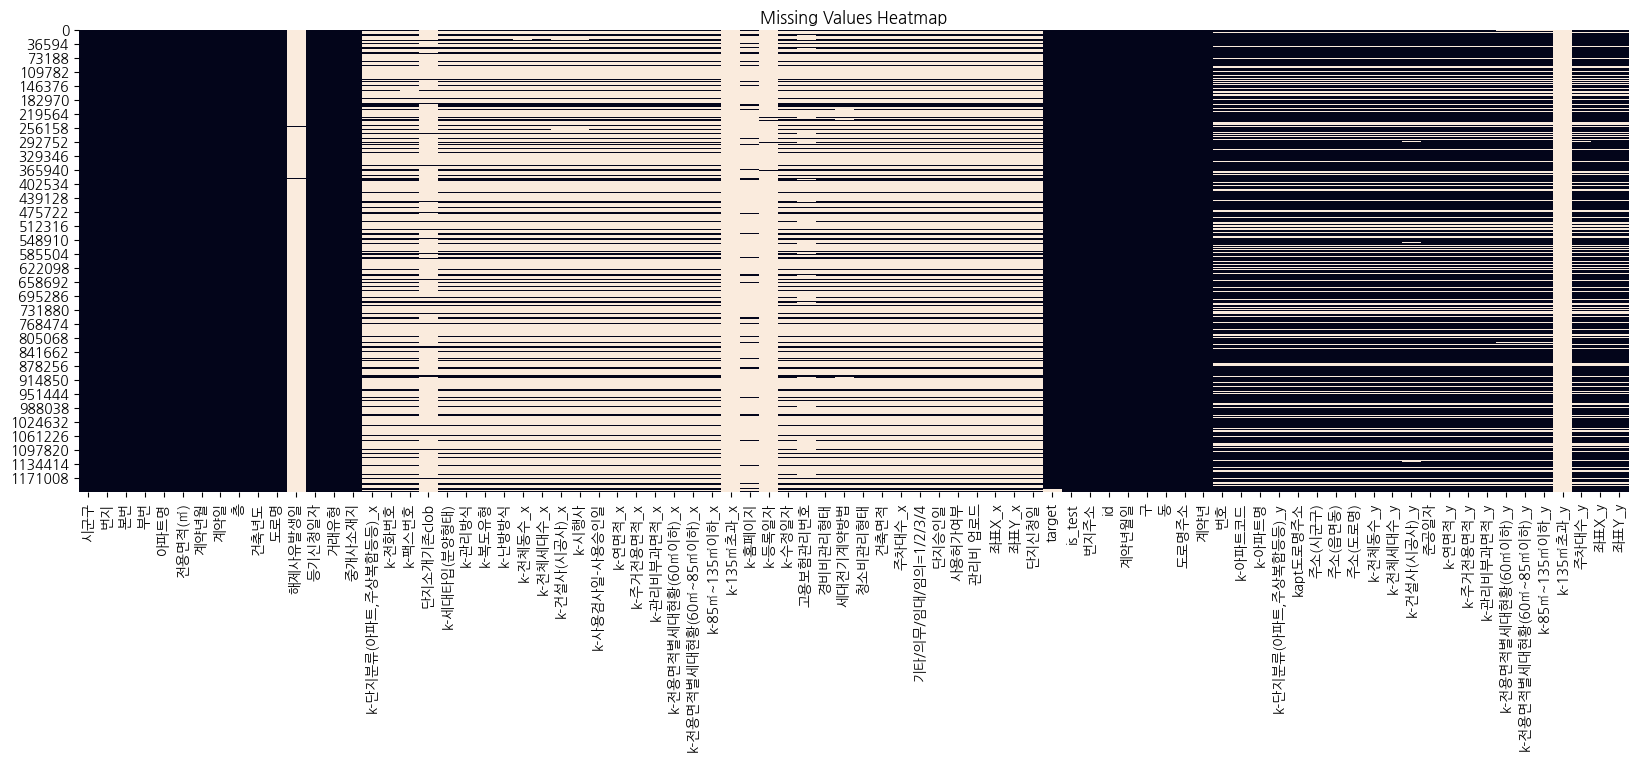

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
train_test[train_test.is_test==0].target.isna().sum()

0

In [ ]:
train_test_seoul_apart.columns

In [7]:
train_test_seoul_apart.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test', '번지주소', 'id', '계약년월일', '구',
       '동', '도로명주소', '계약년'],
      dtype='object')

# 역 WGS1984  
https://business.juso.go.kr/addrlink/elctrnMapProvd/geoDBDwldList.do?menu=%EC%82%AC%EB%AC%BC%EC%A3%BC%EC%86%8C%20%EC%8B%9C%EC%84%A4%20%EA%B8%B0%EC%A4%80%EC%A0%90#this

In [5]:
train_test.좌표X.isna().sum()

876232

In [4]:
train_test_seoul_apart.좌표X_y.isna().sum()

273097

In [26]:
df.좌표X_y.isna().sum()

260767

In [ ]:
import numpy as np

subset = train_test_seoul_apart[['도로명주소','좌표X_y','좌표Y_y']].drop_duplicates() # 9334

# 버스 정류장 데이터
real_estate = pd.DataFrame({
    'Property_ID': subset.도로명주소,
    'X': subset.좌표X_y,
    'Y': subset.좌표Y_y,
})

Bus_stations = pd.DataFrame({
    'Bus_Station_ID': bus_feature['노드 ID'],
    'Station_Name': bus_feature.정류소명,
    'X': bus_feature.X좌표,
    'Y': bus_feature.Y좌표,
})

# 지하철 정류장 데이터
subway_stations = pd.DataFrame({
    'Subway_Station_ID': subway_feature.역사_ID,
    'Station_Name': subway_feature.역사명,
    'X': subway_feature.경도,
    'Y': subway_feature.위도,
})

def haversine_np(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance between two points on the earth (specified in decimal degrees)"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c  # Multiply by Earth radius to get kilometers
    return km

# 가장 가까운 정류소 계산
def calculate_nearest_station(real_estate, stations):
    min_distances = []
    nearest_station_names = []
    for index, real in real_estate.iterrows():
        distances = haversine_np(real['X'], real['Y'], stations['X'].values, stations['Y'].values)
        min_index = distances.argmin()
        min_distances.append(distances[min_index])
        nearest_station_names.append(stations.iloc[min_index]['Station_Name'])
    return min_distances, nearest_station_names

# 버스 정류장
min_distances, nearest_station_names = calculate_nearest_station(real_estate, Bus_stations)
real_estate['Nearest_Bus_Station_Distance'] = min_distances
real_estate['Nearest_Bus_Station_Name'] = nearest_station_names

# 지하철역
min_distances, nearest_station_names = calculate_nearest_station(real_estate, subway_stations)
real_estate['Nearest_Subway_Station_Distance'] = min_distances
real_estate['Nearest_Subway_Station_Name'] = nearest_station_names

print(real_estate.head(1))


In [121]:
real_estate.head(5)

,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Bus_Station_Name,Nearest_Subway_Station_Distance,Nearest_Subway_Station_Name
0,서울특별시 강남구 언주로 3,127.06,37.48,0.06,개포우성아파트,1.13,구룡
12,서울특별시 강남구 개포로 307,127.06,37.48,0.10,우성3차아파트,0.41,구룡
25,서울특별시 강남구 개포로109길 69,127.08,37.50,0.20,코원에너지서비스,0.40,대청
38,서울특별시 강남구 개포로 310,127.06,37.48,0.23,개포주공1단지아파트,0.76,구룡
39,서울특별시 강남구 개포로 310,127.06,37.48,0.23,개포주공1단지아파트,0.73,구룡


In [122]:
real_estate.to_csv(r'C:\Users\user\upstage3-python\12.upstage_project_House_Price_Prediction\asset\data\station_distance.csv', index=False)

# 모두 연결해서 테스트해보기

In [5]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [10]:
match_build_seoul

,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,94,0.1,03047,1111010100101440003031291,Unnamed: 11,근린생활시설,1111051500,청운효자동,1,0.2,0.3,1.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,0.4,953243.01328,1954025.806161,953241.683263,1954023.466812,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1.2,Unnamed: 32
0,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,96,0,3047,1111010100101080014031432,평안빌,주택,1.111052e+09,청운효자동,4,0,2,1,NaN,NaN,NaN,1,953247.695696,1.954041e+06,953243.258151,1.954034e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
1,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,98,0,3047,1111010100101080013031431,청운빌라,주택,1.111052e+09,청운효자동,4,1,2,1,에이동,NaN,NaN,1,953248.552199,1.954060e+06,953240.877646,1.954055e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
2,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,1111010100101340002031304,풍림팍사이드빌라,주택,1.111052e+09,청운효자동,4,1,2,2,NaN,NaN,NaN,1,953194.413607,1.954068e+06,953195.459364,1.954079e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
3,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,1111010100101340002031311,풍림팍사이드빌라,주택,1.111052e+09,청운효자동,0,0,2,2,NaN,NaN,NaN,1,953183.480942,1.954081e+06,953195.459364,1.954079e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
4,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,4,3032,1111010100101300002031300,경복빌라,주택,1.111052e+09,청운효자동,3,1,0,2,NaN,NaN,NaN,1,953188.419102,1.954103e+06,953193.346779,1.954097e+06,Seoul,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599937,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,49,0,5200,1174011000101590000000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970445.820829,1.952917e+06,970450.233824,1.952919e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599938,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,52,0,5200,1174011000101550015000001,NaN,주택,1.174052e+09,강일동,3,0,0,1,NaN,NaN,NaN,1,970406.271770,1.952959e+06,970400.569397,1.952952e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599939,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,57,0,5200,1174011000101580003000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970457.187938,1.952895e+06,970433.538895,1.952889e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN
599940,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,59,0,5200,1174011000101760002000001,NaN,농축수산시설,1.174052e+09,강일동,1,0,0,1,NaN,NaN,NaN,0,970480.771663,1.952885e+06,970456.383107,1.952880e+06,Seoul,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN


In [ ]:
train_test[train_test.도로명주소.str.contains('진관3로 77')==True]

In [ ]:
train_test[train_test.아파트명.str.contains('한화꿈에')==True]

In [18]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)
seoul_apart.head(3)

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
0,1,A15679103,우리유앤미,아파트,서울특별시 동작구 서달로 83,동작구,흑석동,서달로,2,206,우리건설,2003-12-26,27097.0,15827.0,20098.0,89.0,93.0,24.0,NaN,223.0,126.9596386,37.500668
1,2,A13876112,송파파인타운13단지,아파트,서울특별시 송파구 송파대로8길 10,송파구,장지동,송파대로8길,4,197,양우건설(주),2011-01-27,30646.0,16720.0,22520.0,0.0,197.0,0.0,NaN,225.0,127.1291789,37.476897
2,3,A13873701,오금현대백조(임대),아파트,서울특별시 송파구 양재대로72길 20,송파구,오금동,양재대로72길,1,153,현대건설,1997-01-24,7318.0,4743.0,4743.0,153.0,0.0,0.0,NaN,60.0,127.1287745,37.508906


In [ ]:
'id', '계약년월일', '구', '동', '도로명주소', '층', 

In [ ]:
df = pd.merge(train_test, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소', how='left')

## trainset 셋팅

In [284]:
train_test_seoul_apart

,Unnamed: 0,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)_x",k-복도유형,k-전체동수_x,k-전체세대수_x,k-건설사(시공사)_x,k-시행사,k-사용검사일-사용승인일,k-연면적_x,k-주거전용면적_x,k-관리비부과면적_x,k-전용면적별세대현황(60㎡이하)_x,k-전용면적별세대현황(60㎡~85㎡이하)_x,k-85㎡~135㎡이하_x,k-135㎡초과_x,건축면적,주차대수_x,좌표X_x,좌표Y_x,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)_y",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수_y,k-전체세대수_y,k-건설사(시공사)_y,준공일자,k-연면적_y,k-주거전용면적_y,k-관리비부과면적_y,k-전용면적별세대현황(60㎡이하)_y,k-전용면적별세대현황(60㎡~85㎡이하)_y,k-85㎡~135㎡이하_y,k-135㎡초과_y,주차대수_y,좌표X_y,좌표Y_y
0,0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3,2017,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
1,1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,123500.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 4층,2017-12-22,강남구,개포동,서울특별시 강남구 언주로 3,2017,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
2,2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,91500.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 5층,2017-12-28,강남구,개포동,서울특별시 강남구 언주로 3,2017,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
3,3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,130000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 4층,2018-01-03,강남구,개포동,서울특별시 강남구 언주로 3,2018,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
4,4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,117000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 2층,2018-01-08,강남구,개포동,서울특별시 강남구 언주로 3,2018,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,262.0,127.05721,37.476763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,신내역로1길 85,아파트,혼합식,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0,1568.0,127.10672,37.618870,NaN,1,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내동 816 13층,2023-07-19,중랑구,신내동,서울특별시 중랑구 신내역로1길 85,2023,3601.0,A13113008,신내우디안1단지,아파트,서울특별시 중랑구 신내역로1길 85,중랑구,신내동,신내역로1길,16.0,1402.0,한신공영(주),2014-06-18,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,1568.0,127.10672,37.618870
1128090,1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,신내역로1길 85,아파트,혼합식,16.0,1402.0,한신공영(주),SH공사,2014-06-18 00:00:00.0,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0,1568.0,127.10672,37.618870,NaN,1,서울특별시 중랑구 신내동 816,서울특별시 중랑구 신내동 816 12층,2023-07-25,중랑구,신내동,서울특별시 중랑구 신내역로1길 85,2023,3601.0,A13113008,신내우디안1단지,아파트,서울특별시 중랑구 신내역로1길 85,중랑구,신내동,신내역로1길,16.0,1402.0,한신공영(주),2014-06-18,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,1568.0,127.10672,37.618870
1128091,1128091,서울특별시 중랑구 신내동,816

In [253]:
trainset = pd.merge(train_test_seoul_apart, finance, left_on='계약년월', right_on='시점', how='left')

In [254]:
# 'Unnamed:'로 시작하는 컬럼을 필터링하여 제거
trainset = trainset.loc[:, ~trainset.columns.str.startswith('Unnamed:')]

In [255]:
columns = pd.DataFrame(trainset.columns)

In [256]:
trainset.shape

(1128094, 115)

In [ ]:
trainset[(trainset.좌표X_y==127.05721)&(trainset.좌표Y_y==37.476763)]

In [ ]:
trainset.좌표Y_y

In [148]:
station_distance.head(1)

,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Bus_Station_Name,Nearest_Subway_Station_Distance,Nearest_Subway_Station_Name
0,서울특별시 강남구 언주로 3,127.05721,37.476763,0.061744,개포우성아파트,1.129065,구룡


In [258]:
import pandas as pd

# 데이터프레임 예제 생성 및 데이터 타입 변환 (실제 데이터에 맞춰야 함)
trainset['좌표X_y'] = pd.to_numeric(trainset['좌표X_y'], errors='coerce')
trainset['좌표Y_y'] = pd.to_numeric(trainset['좌표Y_y'], errors='coerce')
station_distance['X'] = pd.to_numeric(station_distance['X'], errors='coerce')
station_distance['Y'] = pd.to_numeric(station_distance['Y'], errors='coerce')

# merge 함수 실행
df = pd.merge(trainset, station_distance, left_on=['도로명주소', '좌표X_y', '좌표Y_y'], right_on=['Property_ID', 'X', 'Y'], how='left')


In [259]:
df.shape

(1128094, 122)

In [260]:
df.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset.csv', index=False)

In [265]:
trainset = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset.csv')

In [263]:
selected_columns  = ['아파트명','전용면적(㎡)','구','동','계약년월','층','번지주소','도로명주소','k-전체동수_y','k-전체세대수_y','건축년도',
           'k-전체동수_y','k-전체세대수_y','k-건설사(시공사)_y','주차대수_y',
           'target','is_test',
           '전국_부동산소비자심리지수','국고채-회사채','서울특별시_가계대출',
           '서울특별시_주택담보대출','서울특별시_주택매매거래량','서울특별시_아파트매매거래량','서울특별시_주택미분양',
           '서울특별시_매매가격대비전세가격비',
           'X','Y', 'Nearest_Bus_Station_Distance','Nearest_Subway_Station_Distance'
           ]

In [266]:
trainset_0714 = trainset[selected_columns]

In [267]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False, encoding='CP949')

In [268]:
trainset_0714.columns

Index(['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', '도로명주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-전체동수_y', 'k-전체세대수_y', 'k-건설사(시공사)_y', '주차대수_y',
       'target', 'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출',
       '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양',
       '서울특별시_매매가격대비전세가격비', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance'],
      dtype='object')

In [170]:
trainset.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,"k-단지분류(아파트,주상복합등등)_x",k-복도유형,k-전체동수_x,k-전체세대수_x,k-건설사(시공사)_x,k-시행사,k-사용검사일-사용승인일,k-연면적_x,k-주거전용면적_x,k-관리비부과면적_x,k-전용면적별세대현황(60㎡이하)_x,k-전용면적별세대현황(60㎡~85㎡이하)_x,k-85㎡~135㎡이하_x,k-135㎡초과_x,건축면적,주차대수_x,좌표X_x,좌표Y_x,target,is_test,번지주소,id,계약년월일,구,동,도로명주소,계약년,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)_y",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수_y,k-전체세대수_y,k-건설사(시공사)_y,준공일자,...,전국_주택담보대출,서울특별시_주택담보대출,전국_주택매매거래량,서울특별시_주택매매거래량,전국_아파트매매거래량,서울특별시_아파트매매거래량,전국매매가격지수,전국전세가격지수,전국_주택인허가실적,서울특별시_주택인허가실적,전국_주택착공실적,서울특별시_주택착공실적,전국_주택준공실적,서울특별시_주택준공실적,전국_주택미분양,서울특별시_주택미분양,서울특별시_매매가격대비전세가격비,미분양_서울특별시,미분양_종로구,미분양_강남구,미분양_중구,미분양_강동구,미분양_용산구,미분양_성동구,미분양_강북구,미분양_강서구,미분양_광진구,미분양_동대문구,미분양_관악구,미분양_중랑구,미분양_성북구,미분양_구로구,미분양_금천구,미분양_노원구,미분양_도봉구,미분양_은평구,미분양_동작구,미분양_서대문구,미분양_마포구,미분양_양천구,미분양_서초구,미분양_송파구,미분양_영등포구,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Bus_Station_Name,Nearest_Subway_Station_Distance,Nearest_Subway_Station_Name
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,아파트,계단식,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0,262.0,127.05721,37.476763,124000.0,0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 개포동 658-1 3층,2017-12-08,강남구,개포동,서울특별시 강남구 언주로 3,2017,40291.0,A10023565,개포6차우성아파트,아파트,서울특별시 강남구 언주로 3,강남구,개포동,언주로,8.0,270.0,우성건설,1987-11-21,...,578312.9,176991.0,71646.0,13740.0,46292.0,8484.0,87.701,93.042,653441.0,113131.0,103892.0,13157.0,52928.0,5968.0,57330.0,45.0,NaN,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,서울특별시 강남구 언주로 3,127.05721,37.476763,0.061744,개포우성아파트,1.129065,구룡


### jimi로 다시 trainset 만들기 --> 아직 못함

In [165]:
seoul_apart_jimi.columns

Index([         '입주유형',           '단지명',         '도로명주소',         '법정동주소',
                  '동수',        '합계 세대수',        '분양 세대수',        '임대 세대수',
            '토지 면적(㎡)',         '합계 동수',         '5층 동수',        '5층 세대수',
            '6~10층 동수',     '6~10층 세대수',     '11~15층 동수',    '11~15층 세대수',
           '16~20층 동수',    '16~20층 세대수',      '21층이상 동수',     '21층이상 세대수',
            '~40㎡ 세대수',   '40㎡~60㎡ 세대수',   '60㎡~85㎡ 세대수',  '85㎡~102㎡ 세대수',
       '102㎡~135㎡ 세대수',     '135㎡~ 세대수',   'Unnamed: 26',   'Unnamed: 27',
         'Unnamed: 28',   'Unnamed: 29',   'Unnamed: 30',   'Unnamed: 31',
                   117,             364],
      dtype='object')

In [166]:
df = pd.merge(train_test_final, seoul_apart_jimi, left_on='도로명주소', right_on='도로명주소', how='left')

In [167]:
df.shape

(1134571, 72)

# 대장아파트 거리

In [458]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [72]:
import math

In [73]:

# 지역구별 대장 아파트들을 입력합니다.
lead_house = {
    "강서구" : (37.56520754904415, 126.82349451366355),
    "관악구" : (37.47800896704934, 126.94178722423047),
    "강남구" : (37.530594054209146, 127.0262701317293),
    "강동구" : (37.557175745977375, 127.16359581113558),
    "광진구" : (37.543083184171, 127.0998363490422),
    "구로구" : (37.51045944660659, 126.88687199829572),
    "금천구" : (37.459818907487936, 126.89741481874103),
    "노원구" : (37.63952738902813, 127.07234254197617),
    "도봉구" : (37.65775043994647, 127.04345013224447),
    "동대문구" : (37.57760781415707, 127.05375628992316),
    "동작구" : (37.509881249641495, 126.9618159122961),
    "마포구" : (37.54341664563958, 126.93601641235335),
    "서대문구" : (37.55808950436837, 126.9559315685538),
    "서초구" : (37.50625410912666, 126.99846468032919),
    "성동구" : (37.53870643389788, 127.04496220606433),
    "성북구" : (37.61158435092128, 127.02699796439015),
    "송파구" : (37.512817775046074, 127.08340371063358),
    "양천구" : (37.526754982736556, 126.86618704123521),
    "영등포구" : (37.52071403351804, 126.93668907644046),
    "용산구" : (37.521223570097305, 126.97345317787784),
    "은평구" : (37.60181702377437, 126.9362806808709),
    "종로구" : (37.56856915384472, 126.96687674967252),
    "중구" : (37.5544678205846, 126.9634879236162),
    "중랑구" : (37.58171824083332, 127.08183326205129),
    "강북구" : (37.61186335979484, 127.02822407466175)
}

In [74]:
# 위경도를 이용해 두 지점간의 거리를 구하는 함수를 생성합니다.
def haversine_distance(lat1, lon1, lat2, lon2):
    radius = 6371.0

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = radius * c
    return distance

In [75]:
trainset_0714.columns

Index(['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', 'k-전체동수',
       'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호', '도로명주소_x', '건물관리번호', '동_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84',
       'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance'],
      dtype='object')

In [76]:
# 대장 아파트의 위경도 데이터프레임을 구성합니다.
lead_house_data = pd.DataFrame([{"구": k, "대장_좌표X": v[1], "대장_좌표Y": v[0]} for k, v in lead_house.items()])
# 데이터프레임간 결합을 합니다.
df = pd.merge(trainset_0714, lead_house_data, how="inner", on="구")
# 아까 제작한 haversine_distance 함수를 이용해 대장아파트와의 거리를 계산하고, 새롭게 컬럼을 구성합니다.
trainset_0714['대장아파트_거리'] = df.apply(lambda row: haversine_distance(row["Y"], row["X"], row["대장_좌표Y"], row["대장_좌표X"]), axis=1)

In [77]:
trainset_0714

,도로명주소,아파트명,전용면적(㎡),구,동,계약년월,층,번지주소,k-전체동수,k-전체세대수,...,lower_outliers,upper_outliers,모든학원수,출입구_x좌표_wgs84,출입구_y좌표_wgs84,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Subway_Station_Distance
0,서울특별시 강남구 언주로 3,개포6차우성,79.97,강남구,개포동,201712,3,서울특별시 강남구 개포동 658-1,8.0,270.0,...,0,1,43.0,127.058091,37.476367,서울특별시 강남구 언주로 3,127.058091,37.476367,0.029713,1.165684
1,서울특별시 강남구 언주로 3,개포6차우성,79.97,강남구,개포동,201712,4,서울특별시 강남구 개포동 658-1,8.0,270.0,...,0,1,43.0,127.058091,37.476367,서울특별시 강남구 언주로 3,127.058091,37.476367,0.029713,1.165684
2,서울특별시 강남구 언주로 3,개포6차우성,54.98,강남구,개포동,201712,5,서울특별시 강남구 개포동 658-1,8.0,270.0,...,0,1,43.0,127.058091,37.476367,서울특별시 강남구 언주로 3,127.058091,37.476367,0.029713,1.165684
3,서울특별시 강남구 언주로 3,개포6차우성,79.97,강남구,개포동,201801,4,서울특별시 강남구 개포동 658-1,8.0,270.0,...,0,1,43.0,127.058091,37.476367,서울특별시 강남구 언주로 3,127.058091,37.476367,0.029713,1.165684
4,서울특별시 강남구 언주로 3,개포6차우성,79.97,강남구,개포동,201801,2,서울특별시 강남구 개포동 658-1,8.0,270.0,...,0,1,43.0,127.058091,37.476367,서울특별시 강남구 언주로 3,127.058091,37.476367,0.029713,1.165684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141697,서울특별시 중랑구 신내역로1길 85,신내우디안1단지,84.65,중랑구,신내동,202307,13,서울특별시 중랑구 신내동 816,12.0,1070.0,...,0,1,70.0,127.107439,37.616462,서울특별시 중랑구 신내역로1길 85,127.107439,37.616462,0.168789,0.271460
1141698,서울특별시 중랑구 신내역로1길 85,신내우디안1단지,84.62,중랑구,신내동,202307,12,서울특별시 중랑구 신내동 816,12.0,1070.0,...,0,1,70.0,127.107439,37.616462,서울특별시 중랑구 신내역로1길 85,127.107439,37.616462,0.168789,0.271460
1141699,서울특별시 중랑구 신내역로1길 85,신내우디안1단지,101.65,중랑구,신내동,202308,12,서울특별시 중랑구 신내동 816,12.0,1070.0,...,0,1,70.0,127.107439,37.616462,서울특별시 중랑구 신내역로1길 85,127.107439,37.616462,0.168789,0.271460
1141700,서울특별시 중랑구 신내역로1길 85,신내우디안1단지,84.94,중랑구,신내동,202309,18,서울특별시 중랑구 신내동 816,12.0,1070.0,...,0,1,70.0,127.107439,37.616462,서울특별시 중랑구 신내역로1길 85,127.107439,37.616462,0.168789,0.271460


In [101]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False)

# outlier: 컬럼의 '동'별로 그 해의 target값의 박스플랏 아웃라이어인 경우의 row를 알고 싶어

In [12]:
PATH = r"/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data"
trainset_0714 = pd.read_csv(os.path.join(PATH, "trainset_0714.csv")) # (8325, 7)

In [13]:
trainset_0714.columns

Index(['아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', '도로명주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '동도로명주소_x', '대장아파트_거리'],
      dtype='object')

In [14]:
trainset_0714['계약년'] = pd.to_datetime(trainset_0714['계약년월']).dt.year

In [ ]:
import pandas as pd
import numpy as np

# '동'과 '연도'별로 그룹화하여 각 그룹의 아웃라이어 찾기
def find_lower_bound_outliers(group):
    q1 = group['target'].quantile(0.25)
    q3 = group['target'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    return group[(group['target'] < lower_bound)]

def find_upper_bound_outliers(group):
    q1 = group['target'].quantile(0.25)
    q3 = group['target'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    return group[(group['target'] > upper_bound)]

# 각 '동'과 '연도'별로 아웃라이어 필터링
lower_outliers = trainset_0714.groupby(['동', '계약년']).apply(find_lower_bound_outliers).reset_index(drop=True)
upper_outliers = trainset_0714.groupby(['동', '계약년']).apply(find_upper_bound_outliers).reset_index(drop=True)
print(outliers)


In [ ]:
import pandas as pd

# subset에서 아파트명 컬럼의 고유 값들을 추출
lower_subset = lower_outliers['아파트명'].unique()
upper_subset = upper_outliers['아파트명'].unique()

# trainset_0714에 새로운 컬럼을 추가하고, subset에 속하는 아파트명이면 1, 그렇지 않으면 0을 할당
trainset_0714['lower_outliers'] = trainset_0714['아파트명'].isin(lower_subset).astype(int)
trainset_0714['upper_outliers'] = trainset_0714['아파트명'].isin(upper_subset).astype(int)

# 결과 확인
print(trainset_0714)


In [18]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [44]:
df = trainset_0714[trainset_0714['upper_outliers']==1][['아파트명','구','X','Y','도로명주소']]

In [45]:
king = df.drop_duplicates()

In [46]:
noxy = king[king.X.isna()==True]

In [41]:
match_build_seoul = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv')

/tmp/ipykernel_399359/744312079.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv')


In [43]:
match_build_seoul.columns

Index(['주소관할읍면동코드', '시도명', '시군구명', '읍면동명', '도로명코드', '도로명', '지하여부', '건물본번',
       '건물부번', '우편번호', '건물관리번호', '시군구용건물명', '건축물용도분류', '행정동코드', '행정동명', '지상층수',
       '지하층수', '공동주택구분', '건물수', '상세건물명', '건물명변경이력', '상세건물명변경이력', '거주여부',
       '건물중심점_x좌표', '건물중심점_y좌표', '출입구_x좌표', '출입구_y좌표', '시도명(영문)', '시군구명(영문)',
       '읍면동명(영문)', '도로명(영문)', '읍면동구분', '이동사유코드', '도로명주소', '건물중심점_x좌표_wgs84',
       '건물중심점_y좌표_wgs84', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84'],
      dtype='object')

In [48]:
noxy_wgs84 = pd.merge(noxy, match_build_seoul, on='도로명주소', how='left')

## nan값 업데이트

In [83]:
trainset_0714.loc[trainset_0714['도로명주소'] == '서울특별시 강남구 선릉로 7', '도로명주소'] = '서울특별시 강남구 선릉로 8'

In [58]:
trainset_0714.columns

Index(['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', 'k-전체동수_y',
       'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y', '주차대수_y', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수', '출입구_x좌표_wgs84_x',
       '출입구_y좌표_wgs84_x', 'Property_ID', 'X_y', 'Y_y',
       'Nearest_Bus_Station_Distance_y', 'Nearest_Bus_Station_Name',
       'Nearest_Subway_Station_Distance_y', 'Nearest_Subway_Station_Name'],
      dtype='object')

In [59]:
new_columns = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소',
       'k-전체동수_y', 'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y', '주차대수_y', 'target',
       'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84_x', '출입구_y좌표_wgs84_x',
       'Property_ID', 'X_y', 'Y_y', 'Nearest_Bus_Station_Distance_y',
      'Nearest_Subway_Station_Distance_y']

In [60]:
trainset_0714 = trainset_0714[new_columns]

In [61]:
new_name_columns = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소',
       'k-전체동수', 'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target',
       'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '우편번호', '도로명주소_x',
       '건물관리번호', '동_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84',
       'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
      'Nearest_Subway_Station_Distance']

In [62]:
trainset_0714.columns = new_name_columns

In [63]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [53]:
station_distance.columns

Index(['Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

In [36]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [58]:
trainset_0714['k-전체동수'] = np.nan
trainset_0714['k-전체세대수'] = np.nan
trainset_0714['k-건설사(시공사)'] = np.nan
trainset_0714['주차대수'] = np.nan

In [ ]:
	서울특별시 양천구 신월동 1063	

In [ ]:
df_merged[df_merged['kapt도로명주소']=='서울특별시 양천구 중앙로29길 61']

In [65]:
seoul_apart[seoul_apart['kapt도로명주소']=='서울특별시 양천구 중앙로29길 61']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
2154,3261,A15883402,신정뉴타운롯데캐슬,아파트,서울특별시 양천구 중앙로29길 61,양천구,신월동,중앙로29길,11,930,롯데건설(주),2014-02-07,136790.0,69537.0,93585.0,359.0,476.0,95.0,NaN,1005.0,126.8472217,37.518892


In [73]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, seoul_apart, left_on='도로명주소', right_on='kapt도로명주소', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
# k-전체동수
# k-전체세대수
# k-건설사(시공사)
# 주차대수
trainset_0714['k-전체동수'] = df_merged['k-전체동수'].fillna(df_merged['k-전체동수_fill'])
trainset_0714['k-전체세대수'] = df_merged['k-전체세대수'].fillna(df_merged['k-전체세대수_fill'])
trainset_0714['k-건설사(시공사)'] = df_merged['k-건설사(시공사)'].fillna(df_merged['k-건설사(시공사)_fill'])
trainset_0714['주차대수'] = df_merged['주차대수'].fillna(df_merged['주차대수_fill'])



# 불필요한 컬럼 삭제
columns_to_drop = [col for col in df_merged.columns if '_fill' in col]
df_merged.drop(columns=columns_to_drop, inplace=True)

In [ ]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, seoul_apart, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['X'] = df_merged['X'].fillna(df_merged['X_fill'])

# 불필요한 컬럼 삭제
df_merged.drop(columns=['X_fill'], inplace=True)

In [108]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, station_distance, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['X'] = df_merged['X'].fillna(df_merged['X_fill'])

# 불필요한 컬럼 삭제
df_merged.drop(columns=['X_fill'], inplace=True)

In [109]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, station_distance, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['Y'] = df_merged['Y'].fillna(df_merged['Y_fill'])

# 불필요한 컬럼 삭제
df_merged.drop(columns=['Y_fill'], inplace=True)

In [110]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, station_distance, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['Nearest_Subway_Station_Distance'] = df_merged['Nearest_Subway_Station_Distance'].fillna(df_merged['Nearest_Subway_Station_Distance_fill'])

# 불필요한 컬럼 삭제
df_merged.drop(columns=['Nearest_Subway_Station_Distance_fill'], inplace=True)

In [111]:
## 중요 빈 값 업데이트
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, station_distance, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['Nearest_Bus_Station_Distance'] = df_merged['Nearest_Bus_Station_Distance'].fillna(df_merged['Nearest_Bus_Station_Distance_fill'])

# 불필요한 컬럼 삭제
df_merged.drop(columns=['Nearest_Bus_Station_Distance_fill'], inplace=True)

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
trainset_0714[(trainset_0714['도로명주소']=='서울특별시 강남구 선릉로 8')&(trainset_0714['아파트명']=='개포주공1단지')]

In [80]:
academy.columns

Index(['Unnamed: 0', '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소',
       '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수',
       '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수',
       '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x',
       '동도로명주소_x'],
      dtype='object')

In [98]:
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, academy, left_on='도로명주소', right_on='도로명주소_x', how='left', suffixes=('', '_fill'))

# NaN 값을 새로운 정보로 채우기
trainset_0714['단지고유번호'] = df_merged['단지고유번호'].fillna(df_merged['단지고유번호_fill'])
trainset_0714['필지고유번호'] = df_merged['필지고유번호'].fillna(df_merged['필지고유번호_fill'])
trainset_0714['도로명관리번호'] = df_merged['도로명관리번호'].fillna(df_merged['도로명관리번호_fill'])
trainset_0714['시군구코드'] = df_merged['시군구코드'].fillna(df_merged['시군구코드_fill'])
trainset_0714['지번주소'] = df_merged['지번주소'].fillna(df_merged['지번주소_fill'])
trainset_0714['공시가격기반단지명'] = df_merged['공시가격기반단지명'].fillna(df_merged['공시가격기반단지명_fill'])
trainset_0714['단지종류코드'] = df_merged['단지종류코드'].fillna(df_merged['단지종류코드_fill'])

trainset_0714['동수'] = df_merged['동수'].fillna(df_merged['동수_fill'])
trainset_0714['세대수'] = df_merged['세대수'].fillna(df_merged['세대수_fill'])
trainset_0714['사용승인일자'] = df_merged['사용승인일자'].fillna(df_merged['사용승인일자_fill'])
trainset_0714['입시학원수'] = df_merged['입시학원수'].fillna(df_merged['입시학원수_fill'])
trainset_0714['중형학원수'] = df_merged['중형학원수'].fillna(df_merged['중형학원수_fill'])
trainset_0714['대형학원수'] = df_merged['대형학원수'].fillna(df_merged['대형학원수_fill'])
trainset_0714['종합학원수'] = df_merged['종합학원수'].fillna(df_merged['종합학원수_fill'])
trainset_0714['외국어학원수'] = df_merged['외국어학원수'].fillna(df_merged['외국어학원수_fill'])
trainset_0714['예체능학원수'] = df_merged['예체능학원수'].fillna(df_merged['예체능학원수_fill'])
trainset_0714['독서실수'] = df_merged['독서실수'].fillna(df_merged['독서실수_fill'])
trainset_0714['정보학원수'] = df_merged['정보학원수'].fillna(df_merged['정보학원수_fill'])
trainset_0714['특수교육학원수'] = df_merged['특수교육학원수'].fillna(df_merged['특수교육학원수_fill'])
trainset_0714['직업기술학원수'] = df_merged['직업기술학원수'].fillna(df_merged['직업기술학원수_fill'])
trainset_0714['기타학원수'] = df_merged['기타학원수'].fillna(df_merged['기타학원수_fill'])

# 불필요한 컬럼 삭제
columns_to_drop = [col for col in df_merged.columns if '_fill' in col]
df_merged.drop(columns=columns_to_drop, inplace=True)


In [93]:
new_name_columns =['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', 'k-전체동수',
       'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84', '출입구_y좌표_wgs84',
       'Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance']

In [94]:
trainset_0714.columns = new_name_columns

In [87]:
academy.columns

Index(['Unnamed: 0', '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소',
       '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수',
       '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수',
       '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x',
       '동도로명주소_x'],
      dtype='object')

In [95]:
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, academy, left_on='도로명주소', right_on='도로명주소_x', how='left', suffixes=('', '_fill'))

# 기존 컬럼 업데이트
trainset_0714['단지고유번호'] = df_merged['단지고유번호'].fillna(df_merged['단지고유번호_fill'])
# 다른 컬럼들도 같은 방식으로 업데이트
#trainset_0714['결과코드_x'] = df_merged['결과코드_x'].fillna(df_merged['결과코드_x_fill'])
trainset_0714['우편번호_x'] = df_merged['우편번호_x'].fillna(df_merged['우편번호_x_fill'])
trainset_0714['도로명주소_x'] = df_merged['도로명주소_x'].fillna(df_merged['도로명주소_x_fill'])
trainset_0714['건물관리번호_x'] = df_merged['건물관리번호_x'].fillna(df_merged['건물관리번호_x_fill'])
trainset_0714['동_x'] = df_merged['동_x'].fillna(df_merged['동_x_fill'])
#trainset_0714['동도로명주소_x'] = df_merged['동도로명주소_x'].fillna(df_merged['동도로명주소_x_fill'])

# 불필요한 컬럼 삭제
columns_to_drop = [col for col in df_merged.columns if '_fill' in col or col.endswith('_x')]
df_merged.drop(columns=columns_to_drop, inplace=True)


In [99]:
import pandas as pd

# 가정: trainset_0714 데이터프레임이 이미 정의되어 있고, 필요한 컬럼들을 포함하고 있음
# 데이터프레임의 예시 컬럼에 NaN 값을 0으로 채우고 모든 학원수의 합을 계산
trainset_0714['모든학원수'] = (
    trainset_0714['소형학원수'].fillna(0) +
    trainset_0714['중형학원수'].fillna(0) +
    trainset_0714['대형학원수'].fillna(0) +
    trainset_0714['종합학원수'].fillna(0) +
    trainset_0714['입시학원수'].fillna(0) +
    trainset_0714['외국어학원수'].fillna(0) +
    trainset_0714['예체능학원수'].fillna(0) +
    trainset_0714['독서실수'].fillna(0) +
    trainset_0714['정보학원수'].fillna(0)
)

# 결과 확인을 위한 출력 (예시로 몇 개의 행만 출력)
print(trainset_0714[['소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '모든학원수']].head())


   소형학원수  중형학원수  대형학원수  종합학원수  입시학원수  외국어학원수  예체능학원수  독서실수  정보학원수  모든학원수
0    0.0    3.0    0.0    2.0   23.0     1.0    14.0   0.0    0.0   43.0
1    0.0    3.0    0.0    2.0   23.0     1.0    14.0   0.0    0.0   43.0
2    0.0    3.0    0.0    2.0   23.0     1.0    14.0   0.0    0.0   43.0
3    0.0    3.0    0.0    2.0   23.0     1.0    14.0   0.0    0.0   43.0
4    0.0    3.0    0.0    2.0   23.0     1.0    14.0   0.0    0.0   43.0


In [103]:
trainset_0714['소형학원수'] = trainset_0714['소형학원수'].fillna(0)

In [114]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [13]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [8]:
station_distance.columns

Index(['Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

In [9]:
trainset_0714.columns

Index(['Unnamed: 0.1', '도로명주소', 'Unnamed: 0', '아파트명', '전용면적(㎡)', '구', '동',
       '계약년월', '층', '번지주소', 'k-전체동수_y', 'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y',
       '주차대수_y', 'target', 'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출',
       '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양',
       '서울특별시_매매가격대비전세가격비', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '동도로명주소_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수'],
      dtype='object')

In [101]:
# NaN 값 채우기 위해 다시 merge
df_merged = pd.merge(trainset_0714, station_distance, left_on='도로명주소', right_on='Property_ID', how='left', suffixes=('', '_fill'))

# 기존 컬럼 업데이트
trainset_0714['X'] = df_merged['X'].fillna(df_merged['X_fill'])
trainset_0714['Y'] = df_merged['Y'].fillna(df_merged['Y_fill'])
trainset_0714['Nearest_Bus_Station_Distance'] = df_merged['Nearest_Bus_Station_Distance'].fillna(df_merged['Nearest_Bus_Station_Distance_fill'])
trainset_0714['Nearest_Subway_Station_Distance'] = df_merged['Nearest_Subway_Station_Distance'].fillna(df_merged['Nearest_Subway_Station_Distance_fill'])

# 불필요한 컬럼 삭제
columns_to_drop = [col for col in df_merged.columns if '_fill' in col]
df_merged.drop(columns=columns_to_drop, inplace=True)


# 중간 결측치 점검

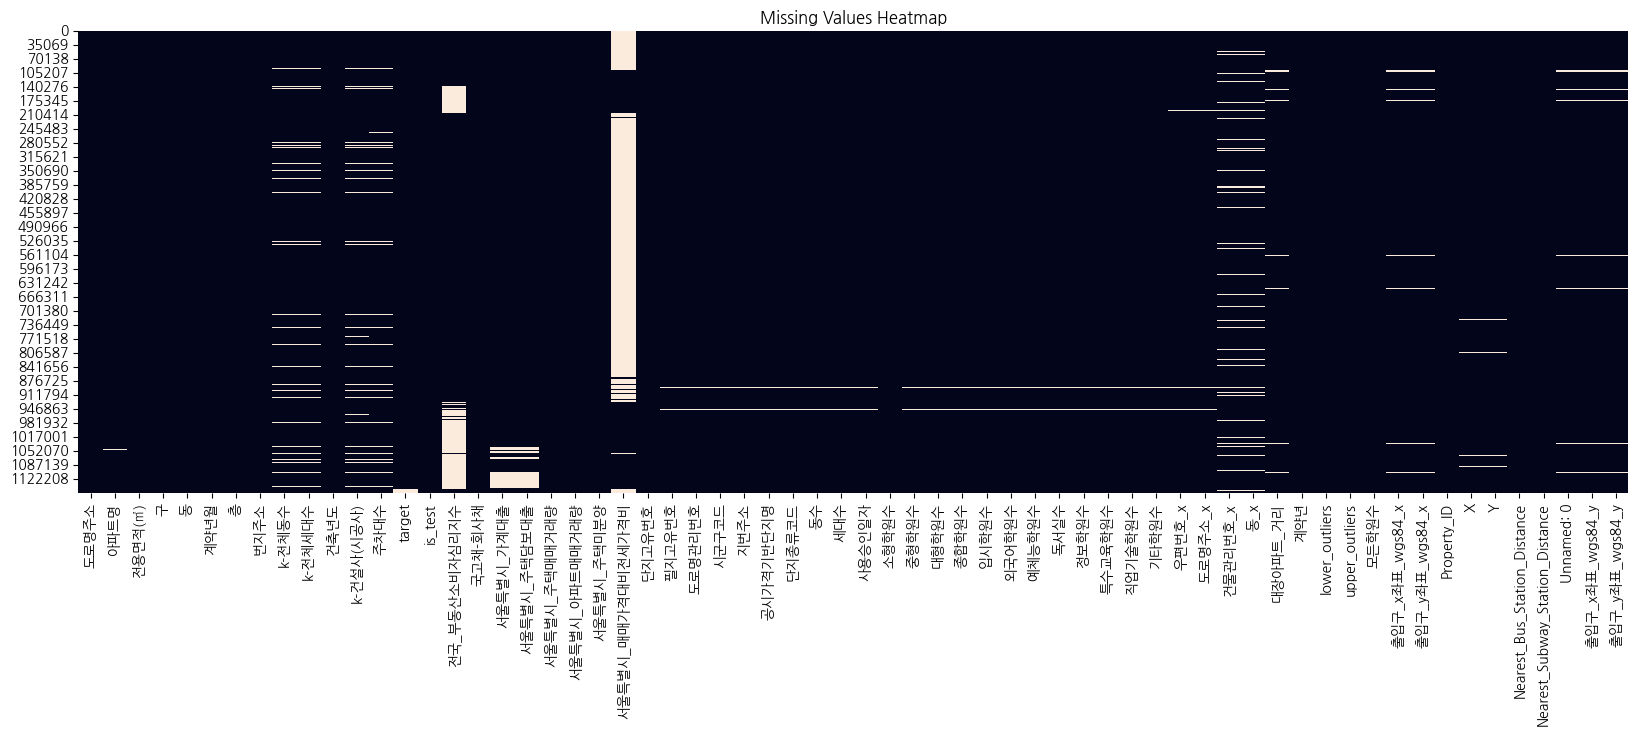

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 생성
plt.figure(figsize=(20, 6))  # 가로 16인치, 세로 6인치로 설정
sns.heatmap(trainset_0714.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# X,Y 빈 값 채우기

In [6]:
match_build_seoul = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv')

/tmp/ipykernel_415536/744312079.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  match_build_seoul = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul.csv')


In [8]:
match_build_seoul[(match_build_seoul['지하여부']==0)&(match_build_seoul['거주여부']==1)].shape

(516672, 38)

In [11]:
df = match_build_seoul[['도로명주소','출입구_x좌표_wgs84','출입구_y좌표_wgs84']]

In [13]:
df

,도로명주소,출입구_x좌표_wgs84,출입구_y좌표_wgs84
0,서울특별시 종로구 자하문로 94,126.970406,37.584415
1,서울특별시 종로구 자하문로 96,126.970423,37.584513
2,서울특별시 종로구 자하문로 98,126.970394,37.584697
3,서울특별시 종로구 자하문로 99-3,126.969878,37.584916
4,서울특별시 종로구 자하문로 99-3,126.969878,37.584916
...,...,...,...
599938,서울특별시 강동구 가래여울길 49,127.165354,37.575175
599939,서울특별시 강동구 가래여울길 52,127.164790,37.575474
599940,서울특별시 강동구 가래여울길 57,127.165166,37.574902
599941,서울특별시 강동구 가래여울길 59,127.165425,37.574825


In [14]:
match_build_seoul_no_duplicates = df.drop_duplicates()

In [15]:
match_build_seoul_no_duplicates.shape

(529304, 3)

In [16]:
match_build_seoul_no_duplicates

,도로명주소,출입구_x좌표_wgs84,출입구_y좌표_wgs84
0,서울특별시 종로구 자하문로 94,126.970406,37.584415
1,서울특별시 종로구 자하문로 96,126.970423,37.584513
2,서울특별시 종로구 자하문로 98,126.970394,37.584697
3,서울특별시 종로구 자하문로 99-3,126.969878,37.584916
5,서울특별시 종로구 자하문로 99-4,126.969853,37.585080
...,...,...,...
599938,서울특별시 강동구 가래여울길 49,127.165354,37.575175
599939,서울특별시 강동구 가래여울길 52,127.164790,37.575474
599940,서울특별시 강동구 가래여울길 57,127.165166,37.574902
599941,서울특별시 강동구 가래여울길 59,127.165425,37.574825


In [18]:
match_build_seoul_no_duplicates.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul_no_duplicates.csv')

In [104]:
match_build_seoul_no_duplicates = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/match_build_seoul_no_duplicates.csv')

In [105]:
trainset_0714 = pd.merge(trainset_0714, match_build_seoul_no_duplicates, on='도로명주소', how='left')

In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
match_build_seoul

In [ ]:
trainset_0714[trainset_0714['X'].isna()==True]

In [21]:
station_distance.columns

Index(['Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

In [24]:
trainset_0714.columns

Index(['Unnamed: 0.1', '도로명주소', 'Unnamed: 0', '아파트명', '전용면적(㎡)', '구', '동',
       '계약년월', '층', '번지주소', 'k-전체동수_y', 'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y',
       '주차대수_y', 'target', 'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출',
       '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양',
       '서울특별시_매매가격대비전세가격비', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '동도로명주소_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84_x', '출입구_y좌표_wgs84_x',
       '출입구_x좌표_wgs84_y', '출입구_y좌표_wgs84_y'],
      dtype='object')

In [29]:
selected_columns = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동',
       '계약년월', '층', '번지주소', 'k-전체동수_y', 'k-전체세대수_y', '건축년도', 'k-건설사(시공사)_y',
       '주차대수_y', 'target', 'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출',
       '서울특별시_주택담보대출', '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양',
       '서울특별시_매매가격대비전세가격비', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Subway_Station_Distance', '단지고유번호', '필지고유번호', '도로명관리번호',
       '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드', '동수', '세대수', '사용승인일자', '소형학원수',
       '중형학원수', '대형학원수', '종합학원수', '입시학원수', '외국어학원수', '예체능학원수', '독서실수', '정보학원수',
       '특수교육학원수', '직업기술학원수', '기타학원수', '결과코드_x', '우편번호_x', '도로명주소_x',
       '건물관리번호_x', '동_x', '대장아파트_거리', '계약년', 'lower_outliers',
       'upper_outliers', '모든학원수', '출입구_x좌표_wgs84_x', '출입구_y좌표_wgs84_x']

In [30]:
trainset_0714 = trainset_0714[selected_columns]

In [79]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [119]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [ ]:
import numpy as np

subset = trainset_0714[['도로명주소','출입구_x좌표_wgs84_x','출입구_y좌표_wgs84_x']].drop_duplicates() # 9334

# 버스 정류장 데이터
real_estate = pd.DataFrame({
    'Property_ID': subset.도로명주소,
    'X': subset.출입구_x좌표_wgs84_x,
    'Y': subset.출입구_y좌표_wgs84_x,
})

Bus_stations = pd.DataFrame({
    'Bus_Station_ID': bus_feature['노드 ID'],
    'Station_Name': bus_feature.정류소명,
    'X': bus_feature.X좌표,
    'Y': bus_feature.Y좌표,
})

# 지하철 정류장 데이터
subway_stations = pd.DataFrame({
    'Subway_Station_ID': subway_feature.역사_ID,
    'Station_Name': subway_feature.역사명,
    'X': subway_feature.경도,
    'Y': subway_feature.위도,
})

def haversine_np(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance between two points on the earth (specified in decimal degrees)"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c  # Multiply by Earth radius to get kilometers
    return km

# 가장 가까운 정류소 계산
def calculate_nearest_station(real_estate, stations):
    min_distances = []
    nearest_station_names = []
    for index, real in real_estate.iterrows():
        distances = haversine_np(real['X'], real['Y'], stations['X'].values, stations['Y'].values)
        min_index = distances.argmin()
        min_distances.append(distances[min_index])
        nearest_station_names.append(stations.iloc[min_index]['Station_Name'])
    return min_distances, nearest_station_names

# 버스 정류장
min_distances, nearest_station_names = calculate_nearest_station(real_estate, Bus_stations)
real_estate['Nearest_Bus_Station_Distance'] = min_distances
real_estate['Nearest_Bus_Station_Name'] = nearest_station_names

# 지하철역
min_distances, nearest_station_names = calculate_nearest_station(real_estate, subway_stations)
real_estate['Nearest_Subway_Station_Distance'] = min_distances
real_estate['Nearest_Subway_Station_Name'] = nearest_station_names

print(real_estate.head(1))


In [36]:
real_estate.shape

(9277, 7)

In [40]:
real_estate.columns

Index(['Property_ID', 'X', 'Y', 'Nearest_Bus_Station_Distance',
       'Nearest_Bus_Station_Name', 'Nearest_Subway_Station_Distance',
       'Nearest_Subway_Station_Name'],
      dtype='object')

In [37]:
station_distance.shape

(9334, 7)

In [41]:
trainset_0714 = pd.merge(trainset_0714, real_estate, left_on='도로명주소', right_on='Property_ID', how='left')

# 여전히 빈 값 찾기

In [47]:
# '번지주소'가 '서울특별시 강남구 개포동 656'인 행의 '도로명주소' 컬럼 값을 업데이트
trainset_0714.loc[trainset_0714['번지주소'] == '서울특별시 강남구 개포동 656', '도로명주소'] = '서울 강남구 개포로 264'


In [49]:
# '번지주소'가 '서울특별시 강남구 개포동 656'인 행의 '도로명주소' 컬럼 값을 업데이트
trainset_0714.loc[trainset_0714['번지주소'] == '서울특별시 강남구 도곡동 91-5', '도로명주소'] = '서울 강남구 언주로 202'


In [ ]:
trainset_0714[trainset_0714['X_y'].isna()==True]

# 

In [120]:
trainset_0714.columns

Index(['Unnamed: 0.1', '도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층',
       '번지주소', 'k-전체동수', 'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target',
       'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수', '출입구_x좌표_wgs84_x',
       '출입구_y좌표_wgs84_x', 'Property_ID', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance',
       'Unnamed: 0', '출입구_x좌표_wgs84_y', '출입구_y좌표_wgs84_y'],
      dtype='object')

In [121]:
new_columns = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층',
       '번지주소', 'k-전체동수', 'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target',
       'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수','Property_ID', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance','출입구_x좌표_wgs84_y', '출입구_y좌표_wgs84_y']

In [122]:
trainset_0714 =  trainset_0714[new_columns]

In [123]:
new_columns_name = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층',
       '번지주소', 'k-전체동수', 'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target',
       'is_test', '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수','Property_ID', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance','출입구_x좌표_wgs84', '출입구_y좌표_wgs84']

In [125]:
trainset_0714.columns = new_columns_name

In [126]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [127]:
match_build_seoul

,주소관할읍면동코드,시도명,시군구명,읍면동명,도로명코드,도로명,지하여부,건물본번,건물부번,우편번호,...,시군구명(영문),읍면동명(영문),도로명(영문),읍면동구분,이동사유코드,도로명주소,건물중심점_x좌표_wgs84,건물중심점_y좌표_wgs84,출입구_x좌표_wgs84,출입구_y좌표_wgs84
0,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,94,0,3047,...,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN,서울특별시 종로구 자하문로 94,126.970420,37.584437,126.970406,37.584415
1,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,96,0,3047,...,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN,서울특별시 종로구 자하문로 96,126.970473,37.584575,126.970423,37.584513
2,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,98,0,3047,...,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN,서울특별시 종로구 자하문로 98,126.970481,37.584745,126.970394,37.584697
3,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,...,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN,서울특별시 종로구 자하문로 99-3,126.969867,37.584812,126.969878,37.584916
4,1111010100,서울특별시,종로구,청운동,111103100012,자하문로,0,99,3,3032,...,Jongno-gu,Cheongun-dong,Jahamun-ro,1,NaN,서울특별시 종로구 자하문로 99-3,126.969743,37.584932,126.969878,37.584916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599938,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,49,0,5200,...,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN,서울특별시 강동구 가래여울길 49,127.165304,37.575152,127.165354,37.575175
599939,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,52,0,5200,...,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN,서울특별시 강동구 가래여울길 52,127.164854,37.575532,127.164790,37.575474
599940,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,57,0,5200,...,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN,서울특별시 강동구 가래여울길 57,127.165434,37.574960,127.165166,37.574902
599941,1174011000,서울특별시,강동구,강일동,117404858126,가래여울길,0,59,0,5200,...,Gangdong-gu,Gangil-dong,Garaeyeoul-gil,1,NaN,서울특별시 강동구 가래여울길 59,127.165701,37.574865,127.165425,37.574825


# 서울특별시_부동산소비심리지수 컬럼 추가

In [131]:
print(trainset_0714['계약년월'].dtype)


datetime64[ns]


In [135]:
trainset_0714 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv')

In [137]:
import pandas as pd
import numpy as np

trainset_0714['계약년월'] = trainset_0714['계약년월'].astype(str)

# 제공된 지수 데이터
indices = [133.4, 136.7, 131.7, 123.6, 116.2, 108, 109.8, 115.8, 115.4, 112.5, 110.6, 99.9, 100.6, 102.3, 106.7, 109.4, 103.1, 101.4, 104.2, 111.7, 113.9, 112.1, 111.4, 109.1, 107.7, 113, 119.2, 122.5, 118, 111.7, 121.3, 127.8, 122.7, 123.3, 118.8, 111.7, 117.4, 122.4, 127.8, 128.6, 125, 114.8, 126.2, 127.1, 132.3, 134.1, 130.6, 126, 131, 130.3, 127.9, 134.7, 127.2, 112.7, 116.7, 119.5, 121.4, 125.1, 123.1, 122, 126.5, 129, 131.4, 135.9, 125.5, 111.5, 114.7, 114.5, 114.7, 115.9, 115.7, 111.6, 115.2, 110.9, 103.6, 105.6, 101.2, 94.2, 98.4, 101.4, 97.1, 93.5, 89.6, 86.9, 88.6, 91.8, 96.9, 94.1, 88.2, 87.2, 90.1, 89.6, 87.6, 81.6, 84.7, 89, 88.5, 92.6, 100.4, 101.5, 113.3, 110.4, 105.8, 105.9, 99.5, 97.5, 101.8, 112.1, 107.9, 111.1, 116.6, 132.5, 135.5, 118.3, 115.6, 115.4, 115.8, 114.7, 118.4, 121.7, 121.7, 124.2, 123.2, 116.5, 109.9, 102.2, 101.5, 102.7, 105.1, 107.9, 103.7, 97.5, 90.8, 89.1, 86.7, 76.8, 78.3, 75.7, 80.2, 88.4, 89, 93.2, 94.6, 94.4, 100.2, 99.9, 100.9]

# 날짜 범위 생성
dates = pd.date_range(start='2011-07-01', periods=len(indices), freq='M')

# 데이터프레임 생성
index_df = pd.DataFrame({'계약년월': dates, '서울특별시_부동산소비심리지수': indices})

# 계약년월을 문자열 형태로 변환 (예: 202307)
index_df['계약년월'] = index_df['계약년월'].dt.strftime('%Y%m')




# 병합 수행
trainset_0714 = pd.merge(trainset_0714, index_df, on='계약년월', how='left')


/tmp/ipykernel_415536/1496413374.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2011-07-01', periods=len(indices), freq='M')


In [153]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False)


# finance 중 

In [140]:
finance = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/finance.csv')

In [142]:
finance = finance.loc[:, ~finance.columns.str.startswith('Unnamed:')]

In [143]:
finance

,시점,전국_취업자수,서울특별시_취업자수,전국_부동산소비자심리지수,기준금리,국고채,회사채,국고채-회사채,생산자물가지수,소비자물가지수,...,미분양_노원구,미분양_도봉구,미분양_은평구,미분양_동작구,미분양_서대문구,미분양_마포구,미분양_양천구,미분양_서초구,미분양_송파구,미분양_영등포구
0,200701,22846.2,5020.3,NaN,4.5,4.970,5.320,0.350,83.99,76.496,...,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN,NaN,NaN
1,200702,22790.5,4978.8,NaN,4.5,4.910,5.280,0.370,84.04,77.017,...,NaN,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN
2,200703,23235.4,5017.8,NaN,4.5,4.790,5.200,0.410,84.40,77.464,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN
3,200704,23629.4,5080.2,NaN,4.5,4.940,5.340,0.400,84.99,77.761,...,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN
4,200705,23862.9,5124.6,NaN,4.5,5.100,5.490,0.390,85.47,77.836,...,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,202402,28042.6,5219.0,101.7,3.5,3.351,4.053,0.702,118.55,113.780,...,0.0,58.0,0.0,0.0,0.0,79.0,33.0,0.0,0.0,0.0
206,202403,28395.8,5224.1,100.2,3.5,3.310,3.944,0.634,118.82,113.950,...,0.0,58.0,0.0,0.0,0.0,76.0,33.0,0.0,0.0,0.0
207,202404,28693.4,5252.1,100.5,3.5,3.439,3.974,0.535,119.16,114.010,...,0.0,58.0,0.0,0.0,0.0,64.0,33.0,0.0,0.0,0.0
208,202405,28914.8,5248.9,102.6,3.5,3.432,3.876,0.444,119.25,114.100,...,0.0,58.0,0.0,0.0,0.0,63.0,33.0,0.0,0.0,0.0


# 미분양

In [149]:
미분양 = pd.read_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/미분양.csv', encoding='cp949')

In [150]:
미분양

,계약년월,종로구,중구,성동구,용산구,광진구,동대문구,성북구,중랑구,노원구,...,강서구,구로구,영등포구,동작구,관악구,서초구,강남구,금천구,강동구,송파구
0,200701,0,0,0,0.0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
1,200702,0,0,0,0.0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
2,200703,0,0,0,0.0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
3,200704,0,0,0,0.0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
4,200705,0,0,0,0.0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,202302,0,2,0,0.0,3,0,0,0.0,0,...,129,0,0,0,0,0,0,12.0,110,0.0
194,202303,0,2,0,0.0,3,0,0,0.0,0,...,129,0,0,0,0,0,0,12.0,110,0.0
195,202304,0,2,0,0.0,3,0,0,0.0,0,...,126,0,0,0,0,0,0,34.0,91,0.0
196,202305,0,2,0,0.0,3,0,0,0.0,0,...,120,0,0,0,0,0,0,34.0,91,0.0


In [157]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
trainset_0714.dtypes

Unnamed: 0                           int64
도로명주소                               object
아파트명                                object
전용면적(㎡)                            float64
구                                   object
동                                   object
계약년월                                object
층                                    int64
번지주소                                object
k-전체동수                             float64
k-전체세대수                            float64
건축년도                                 int64
k-건설사(시공사)                          object
주차대수                               float64
target                             float64
is_test                              int64
전국_부동산소비자심리지수                      float64
국고채-회사채                            float64
서울특별시_가계대출                         float64
서울특별시_주택담보대출                       float64
서울특별시_주택매매거래량                      float64
서울특별시_아파트매매거래량                     float64
서울특별시_주택미분양                        float64
서울특별시_매매가격대

In [ ]:
미분양[['201712', '강남구']]

In [190]:
미분양.index

RangeIndex(start=0, stop=198, step=1)

In [201]:
미분양

,계약년월,종로구,중구,성동구,용산구,광진구,동대문구,성북구,중랑구,노원구,은평구,서대문구,강북구,마포구,도봉구,양천구,강서구,구로구,영등포구,동작구,관악구,서초구,강남구,금천구,강동구,송파구
0,200701,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,74,0,0,0,0,0,0,0,0.0,0,0.0
1,200702,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,20,0,0,0,0,0,0,0,0.0,0,0.0
2,200703,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,15,0,0,0,0,0,0,0,0.0,0,0.0
3,200704,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,14,0,0,0,0,0,0,0,0.0,0,0.0
4,200705,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0.0,14,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,202302,0,2,0,0.0,3,0,0,0.0,0,0,0,136.0,13,0.0,0,129,0,0,0,0,0,0,12.0,110,0.0
194,202303,0,2,0,0.0,3,0,0,0.0,0,0,0,136.0,0,0.0,0,129,0,0,0,0,0,0,12.0,110,0.0
195,202304,0,2,0,0.0,3,0,0,0.0,0,0,0,123.0,0,0.0,0,126,0,0,0,0,0,0,34.0,91,0.0
196,202305,0,2,0,0.0,3,0,0,0.0,0,0,0,117.0,0,0.0,0,120,0,0,0,0,0,0,34.0,91,0.0


In [ ]:
import pandas as pd

# trainset_0714에 '미분양수' 컬럼 추가
trainset_0714['미분양수'] = None  # 초기값 설정

# 각 행에 대해 미분양수 업데이트
for idx, row in trainset_0714.iterrows():
    year_month = int(row['계약년월'])
    district = row['구']
    
    # 미분양 데이터셋에서 해당 연도와 구의 미분양 수 가져오기
    if district in 미분양.columns[1:]:
        unsold_count = 미분양.loc[미분양['계약년월']==year_month, district]
        
        if not unsold_count.empty:
            print(f"{unsold_count.iloc[0]}")
            trainset_0714.at[idx, '미분양_구'] = unsold_count.iloc[0]
        else:
            print(f"No data for {district} in {year_month}")
    else:
        print("why")

# 결과 출력
print(trainset_0714[['계약년월', '구', '미분양_구']].head())


In [211]:
trainset_0714.drop(columns=['미분양_구','Unnamed: 0'], inplace=True)

In [212]:
trainset_0714.columns

Index(['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', 'k-전체동수',
       'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수', 'Property_ID', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance',
       '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '서울특별시_부동산소비심리지수', '미분양수'],
      dtype='object')

In [213]:
column_name = ['도로명주소', '아파트명', '전용면적(㎡)', '구', '동', '계약년월', '층', '번지주소', 'k-전체동수',
       'k-전체세대수', '건축년도', 'k-건설사(시공사)', '주차대수', 'target', 'is_test',
       '전국_부동산소비자심리지수', '국고채-회사채', '서울특별시_가계대출', '서울특별시_주택담보대출',
       '서울특별시_주택매매거래량', '서울특별시_아파트매매거래량', '서울특별시_주택미분양', '서울특별시_매매가격대비전세가격비',
       '단지고유번호', '필지고유번호', '도로명관리번호', '시군구코드', '지번주소', '공시가격기반단지명', '단지종류코드',
       '동수', '세대수', '사용승인일자', '소형학원수', '중형학원수', '대형학원수', '종합학원수', '입시학원수',
       '외국어학원수', '예체능학원수', '독서실수', '정보학원수', '특수교육학원수', '직업기술학원수', '기타학원수',
       '우편번호_x', '도로명주소_x', '건물관리번호_x', '동_x', '대장아파트_거리', '계약년',
       'lower_outliers', 'upper_outliers', '모든학원수', 'Property_ID', 'X', 'Y',
       'Nearest_Bus_Station_Distance', 'Nearest_Subway_Station_Distance',
       '출입구_x좌표_wgs84', '출입구_y좌표_wgs84', '서울특별시_부동산소비심리지수', '미분양_구']

In [214]:
trainset_0714.columns = column_name

In [215]:
trainset_0714.to_csv(r'/data/ephemeral/home/yjl/upstage-ml-regression-ml5/data/trainset_0714.csv', index=False)


# 일군건설사만 추리기

In [8]:
trainset_0714[trainset_0714['k-건설사(시공사)'].isna()==True][['아파트명','도로명주소','k-건설사(시공사)']]

,아파트명,도로명주소,k-건설사(시공사)
1565,동부센트레빌,서울특별시 강남구 선릉로 206,NaN
1566,동부센트레빌,서울특별시 강남구 선릉로 206,NaN
1620,래미안대치팰리스,서울특별시 강남구 삼성로51길 35,NaN
1621,래미안대치팰리스,서울특별시 강남구 삼성로51길 37,NaN
1869,한보미도맨션2,서울특별시 강남구 삼성로 150,NaN
...,...,...,...
1157170,우정,서울특별시 중랑구 상봉중앙로1다길 21,NaN
1157171,주함해븐타워,서울특별시 중랑구 면목로 491,NaN
1157172,건영2차,서울특별시 중랑구 신내로7길 20,NaN
1157173,건영2차,서울특별시 중랑구 신내로7길 20,NaN


In [24]:
whobuilt = df[df['k-건설사(시공사)_x'].isna()==True][['아파트명','도로명주소','k-건설사(시공사)_x']]

In [25]:
whobuilt.drop_duplicates()

,아파트명,도로명주소,k-건설사(시공사)_x
1819,동부센트레빌,서울특별시 강남구 선릉로 206,NaN
1874,래미안대치팰리스,서울특별시 강남구 삼성로51길 35,NaN
1875,래미안대치팰리스,서울특별시 강남구 삼성로51길 37,NaN
2123,한보미도맨션2,서울특별시 강남구 삼성로 150,NaN
2127,한양팰리스,서울특별시 강남구 삼성로61길 9,NaN
...,...,...,...
1236494,삼성사이버빌리지,서울특별시 중구 중림로 10,NaN
1236497,충무로엘크루메크로시티2차,서울특별시 중구 퇴계로49길 14,NaN
1236498,충무로헤센스마트,서울특별시 중구 서애로1길 11,NaN
1236500,DUO302,서울특별시 중구 난계로 169,NaN


In [27]:
trainset_0714['k-건설사(시공사)'].fillna('', inplace=True)

In [71]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 
trainset_0714[trainset_0714['k-건설사(시공사)']=='삼성물산']

,도로명주소,아파트명,전용면적(㎡),구,동,계약년월,층,번지주소,k-전체동수,k-전체세대수,건축년도,k-건설사(시공사),주차대수,target,is_test,전국_부동산소비자심리지수,국고채-회사채,서울특별시_가계대출,서울특별시_주택담보대출,서울특별시_주택매매거래량,서울특별시_아파트매매거래량,서울특별시_주택미분양,서울특별시_매매가격대비전세가격비,단지고유번호,필지고유번호,도로명관리번호,시군구코드,지번주소,공시가격기반단지명,단지종류코드,동수,세대수,사용승인일자,소형학원수,중형학원수,대형학원수,종합학원수,입시학원수,외국어학원수,예체능학원수,독서실수,정보학원수,특수교육학원수,직업기술학원수,기타학원수,우편번호_x,도로명주소_x,건물관리번호_x,동_x,대장아파트_거리,계약년,lower_outliers,upper_outliers,모든학원수,Property_ID,X,Y,Nearest_Bus_Station_Distance,Nearest_Subway_Station_Distance,출입구_x좌표_wgs84,출입구_y좌표_wgs84,서울특별시_부동산소비심리지수,미분양_구
50,서울특별시 강남구 개포로 310,개포주공1단지,42.550,강남구,개포동,201710,5,서울특별시 강남구 개포동 141,23.0,1957.0,1982,삼성물산,3153.0,125000.0,0,109.9,0.548,278568.7,175427.9,8561.0,3942.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.986551,1970,0,1,0.0,서울특별시 강남구 개포로 310,127.055095,37.481853,0.007396,0.645716,127.055095,37.481853,105.6,0.0
83,서울특별시 강남구 선릉로 8,개포주공1단지,49.560,강남구,개포동,201712,5,서울특별시 강남구 개포동 141,23.0,1957.0,1982,삼성물산,3153.0,155000.0,0,102.2,0.549,282438.7,176991.0,13740.0,8484.0,45.0,NaN,1.168012e+13,1.168010e+18,11680103312200600000800000,11680.0,서울특별시 강남구 개포동 1280,래미안블레스티지,1.0,23.0,1957.0,20190226.0,0.0,8.0,0.0,0.0,32.0,1.0,15.0,0.0,0.0,0.0,0.0,4.0,6326.0,서울특별시 강남구 선릉로 8,1168010300101400000019702,개포동,6.465430,1970,0,1,56.0,서울특별시 강남구 선릉로 8,127.055095,37.481853,0.031253,0.814024,127.063465,37.480492,94.2,0.0
102,서울특별시 강남구 개포로 310,개포주공1단지,58.080,강남구,개포동,201712,4,서울특별시 강남구 개포동 141,23.0,1957.0,1982,삼성물산,3153.0,161000.0,0,102.2,0.549,282438.7,176991.0,13740.0,8484.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.986551,1970,0,1,0.0,서울특별시 강남구 개포로 310,127.055095,37.481853,0.007396,0.645716,127.055095,37.481853,94.2,0.0
119,서울특별시 강남구 선릉로 8,개포주공1단지,56.570,강남구,개포동,201801,5,서울특별시 강남구 개포동 141,23.0,1957.0,1982,삼성물산,3153.0,179000.0,0,109.0,0.532,283669.8,177280.4,15107.0,9938.0,45.0,NaN,1.168012e+13,1.168010e+18,11680103312200600000800000,11680.0,서울특별시 강남구 개포동 1280,래미안블레스티지,1.0,23.0,1957.0,20190226.0,0.0,8.0,0.0,0.0,32.0,1.0,15.0,0.0,0.0,0.0,0.0,4.0,6326.0,서울특별시 강남구 선릉로 8,1168010300101400000019702,개포동,6.465430,1970,0,1,56.0,서울특별시 강남구 선릉로 8,127.055095,37.481853,0.007396,0.645716,127.063465,37.480492,98.4,0.0
120,서울특별시 강남구 개포로 310,개포주공1단지,58.080,강남구,개포동,201801,2,서울특별시 강남구 개포동 141,23.0,1957.0,1982,삼성물산,3153.0,181000.0,0,109.0,0.532,283669.8,177280.4,15107.0,9938.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.986551,1970,0,1,0.0,서울특별시 강남구 개포로 310,127.055095,37.481853,0.007396,0.645716,127.055095,37.481853,98.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155656,서울특별시 양천구 남부순환로65길 6,나산,59.900,양천구,신월동,202308,3,서울특별시 양천구 신월동 217-2,12.0,1317.0,1997,삼성물산,2523.0,NaN,1,107.2,0.773,406315.8,246930.7,6716.0,4091.0,976.0,NaN,1.129010e+13,1.144011e+18,11440114311301000008300000,11440.0,서울특별시 마포구 창전동 440,창전동현대홈타운,1.0,5.0,243.0,20050818.0,11.0,18.0,3.0,2.0,29.0,6.0,55.0,4.0,0.0,0.0,5.0,6.0,4063.0,서울특별시 마포구 서강로 83,1168010700106590000009760,신사동,2.811765,1970,0,0,128.0,서울특별시 양천구 남부순환로65길 6,127.058180,37.675977,0.135904,1.444548,126.834330,37.527812,99.9,NaN
1155665,서울특별시 양천구 중앙로29길 61,롯데캐슬,59.747,양천구,신월동,202308,12,서울특별시 양천구 신월동 1063,4.0,421.0,2014,삼성물산,621.0,NaN,1,107.2,0.773,406315.8,246930.7,6716.0,4091.0,976.0,NaN,1.168012e+13,1.144011e+18,11440114311301000009500000,11440.0,서울특별시 마포구 창전동 437,창전래미안,1.0,11.0,951.0,19980624.0,69.0,31.0,3.0,1.0,41.0,7.0,92.0,4.0,0.0,0.0,13.0,11.0,7020.0,서울특별시 동작구 사당로16길 96,1135010500107200003000782,상계동,1.911901,1970,0,1,248.0,서울특별시 양천구 중앙로29길 61,127.051361,37.671116,0.076579,0.761424,126.847959,37.517447,99.9,NaN
1155666,서울특별시 양천구 중앙로29길 61,롯데캐슬,59.747,양천구,신월동,202308,11,서울특별시 양천구 신월동 1063,4.0,421.0,2014,삼성

In [54]:
test.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

In [ ]:
'서울특별시 양천구 신월동 1063'

In [61]:
test[test['아파트명']=='롯데캐슬'] 

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
4420,서울특별시 동작구 사당동,1132,1132.0,0.0,롯데캐슬,155.600,202308,26,19,2003,사당로27길 190,NaN,,중개거래,서울 동작구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6884,서울특별시 송파구 가락동,79,79.0,0.0,롯데캐슬,180.667,202309,15,4,2003,중대로 121,NaN,20230915,중개거래,서울 송파구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7681,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,116.375,202307,22,19,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7682,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,59.474,202308,2,2,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7683,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,59.747,202308,4,12,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7684,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,59.747,202308,17,11,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7685,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,84.984,202308,26,11,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7686,서울특별시 양천구 신월동,1063,1063.0,0.0,롯데캐슬,84.966,202309,15,11,2014,중앙로29길 61,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7687,서울특별시 양천구 신월동,1057,1057.0,0.0,롯데캐슬,70.910,202307,26,1,2010,오목로5길 19,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7688,서울특별시 양천구 신월동,1057-1,1057.0,1.0,롯데캐슬,84.630,202307,19,5,2010,오목로5길 20,NaN,,중개거래,서울 양천구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
seoul_apart.columns

Index(['번호', 'k-아파트코드', 'k-아파트명', 'k-단지분류(아파트,주상복합등등)', 'kapt도로명주소', '주소(시군구)',
       '주소(읍면동)', '주소(도로명)', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', '준공일자',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '주차대수', '좌표X',
       '좌표Y'],
      dtype='object')

In [42]:
seoul_apart[seoul_apart['kapt도로명주소']=='서울특별시 양천구 중앙로29길 61']

,번호,k-아파트코드,k-아파트명,"k-단지분류(아파트,주상복합등등)",kapt도로명주소,주소(시군구),주소(읍면동),주소(도로명),k-전체동수,k-전체세대수,k-건설사(시공사),준공일자,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,주차대수,좌표X,좌표Y
2154,3261,A15883402,신정뉴타운롯데캐슬,아파트,서울특별시 양천구 중앙로29길 61,양천구,신월동,중앙로29길,11,930,롯데건설(주),2014-02-07,136790.0,69537.0,93585.0,359.0,476.0,95.0,NaN,1005.0,126.8472217,37.518892
